## **Julio García Salas - 22076**
## **Sofía García - 22210**

# **Hoja de trabajo #3**

# **1. Cargar los datos**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print(f"Train dataset: {train_df.shape}")
print(f"Test dataset: {test_df.shape}")

train_df.head()


Train dataset: (1460, 81)
Test dataset: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **1️⃣ Descripción General del Dataset**

El conjunto de datos contiene información detallada sobre viviendas y su precio de venta (`SalePrice`). Se presentan las primeras 5 filas del dataset para visualizar la estructura de las variables.

### **📌 Observaciones Clave**
- **Total de columnas:** 81
- **La columna objetivo (`SalePrice`) está incluida en el dataset.**
- **Tipos de variables presentes:**
  - **Numéricas:** Ej. `LotArea`, `MoSold`, `YrSold`, `SalePrice`
  - **Categóricas:** Ej. `MSZoning`, `Street`, `Alley`, `SaleType`, `SaleCondition`
- **Posibles valores nulos en columnas como `Alley`, `PoolQC`, `Fence`, `MiscFeature`** (se observan valores `NaN`).



# **2.  Descripción de los datos**

In [28]:
train_df.info()

train_df.describe()

missing_values = train_df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

## **2️⃣ Estructura y Tipos de Datos**

El conjunto de datos contiene **1460 registros** y **81 columnas**, con una combinación de variables numéricas y categóricas. A continuación, se detallan los tipos de datos y la cantidad de valores no nulos por variable.

### **📌 Resumen de los Tipos de Datos**
- **35 columnas numéricas (int64)**
- **3 columnas de tipo flotante (float64)**
- **43 columnas categóricas (object)**

### **📊 Variables con Valores Nulos**
Algunas variables contienen valores faltantes que podrían impactar el análisis y los modelos de regresión.

| Variable        | Valores No Nulos | Tipo de Dato  |
|---------------|----------------|-------------|
| **LotFrontage** | 1201 / 1460 | `float64` |
| **Alley** | 91 / 1460 | `object` |
| **MasVnrType** | 1452 / 1460 | `object` |
| **FireplaceQu** | 770 / 1460 | `object` |
| **PoolQC** | 7 / 1460 | `object` |
| **Fence** | 281 / 1460 | `object` |
| **MiscFeature** | 54 / 1460 | `object` |

💡 **Observaciones sobre valores nulos:**
- Variables como **`Alley`**, **`PoolQC`**, **`Fence`**, y **`MiscFeature`** tienen una gran cantidad de valores faltantes y podrían no aportar mucho valor al modelo.
- **`LotFrontage`** tiene 259 valores nulos, lo que podría impactar su uso como predictor.
- Se deben definir estrategias para manejar los valores nulos, ya sea eliminando las variables, imputándolas o reemplazándolas con valores predeterminados.



# **3. Análisis exploratorio**

## **a. Distribución de la Variable SalePrice**

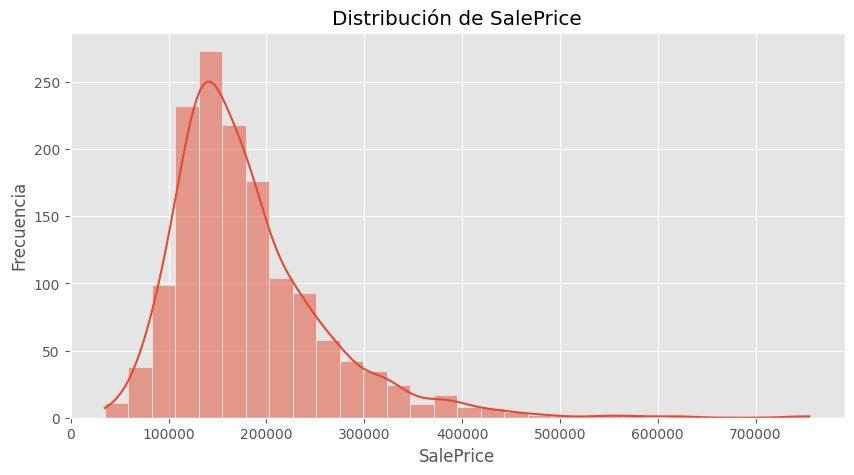

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(train_df["SalePrice"], bins=30, kde=True)
plt.xlabel("SalePrice")
plt.ylabel("Frecuencia")
plt.title("Distribución de SalePrice")
plt.show()

# Estadísticas clave
train_df["SalePrice"].describe()


## **3️⃣ Distribución de la Variable Objetivo (`SalePrice`)**

El objetivo del modelo es predecir `SalePrice`, por lo que es fundamental analizar su distribución. A continuación, se presenta un histograma con la densidad de la variable objetivo.

### **🔍 Observaciones Clave**
1. **Sesgo Positivo (Right-Skewed):**  
   - La distribución muestra un sesgo a la derecha, con una larga cola hacia valores altos.
   - Esto indica que hay algunas viviendas con precios excepcionalmente altos en comparación con el resto.

2. **Precio Promedio y Mediana:**  
   - **Media (`mean`):** 180,921 USD  
   - **Mediana (`50%`):** 163,000 USD  
   - La mediana es menor que la media, lo que confirma que la distribución está sesgada.

3. **Rango de Precios:**  
   - **Mínimo:** 34,900 USD  
   - **Máximo:** 755,000 USD  
   - **El 75% de las casas cuestan menos de 214,000 USD.**

4. **Posibles Valores Atípicos:**  
   - Existen valores muy altos en `SalePrice`, lo que podría influir en los modelos de predicción.
   - Se recomienda analizar estos valores en conjunto con otras variables para decidir si deben transformarse o eliminarse.

---

## **⚠️ Posibles Acciones**
✅ **Transformación Logarítmica:**  
   - Debido al sesgo en la distribución, aplicar `log(SalePrice)` podría mejorar la precisión del modelo.  
   - Esto ayudaría a que los modelos de regresión lineal trabajen mejor con los datos.  

✅ **Identificación de Valores Atípicos:**  
   - Se debe analizar `SalePrice` en función de otras variables como `GrLivArea` y `OverallQual` para ver si los valores extremos corresponden a patrones esperados o son outliers.

✅ **Comparación con Variables Predictoras:**  
   - Se deben examinar las correlaciones con variables clave como `GrLivArea`, `TotalBsmtSF`, y `OverallQual` antes de aplicar la regresión.




## **b. Valores atípicos en SalePrice**

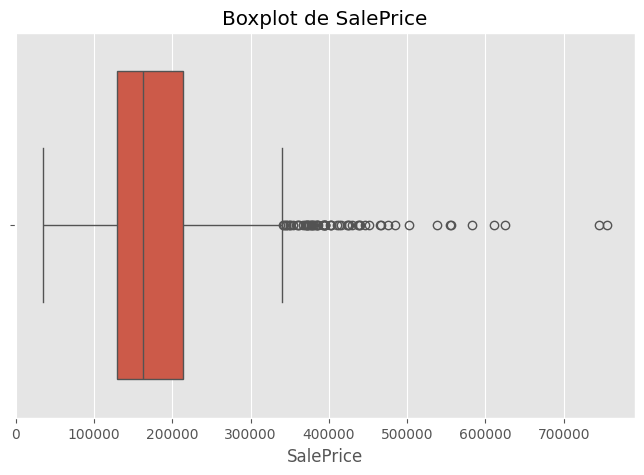

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=train_df["SalePrice"])
plt.title("Boxplot de SalePrice")
plt.show()


# **Análisis Exploratorio - Detección de Valores Atípicos en `SalePrice`**

### **🔍 Observaciones Clave**
1. **Presencia de Valores Atípicos:**  
   - Existen **múltiples valores fuera de los bigotes del boxplot** a partir de aproximadamente **400,000 USD**.
   - Los valores más extremos superan los **700,000 USD**.

2. **Percentiles y Rango Intercuartílico (IQR):**  
   - **25% (Q1):** 129,975 USD  
   - **50% (Mediana):** 163,000 USD  
   - **75% (Q3):** 214,000 USD  
   - **Valores superiores a `Q3 + 1.5*IQR` se consideran outliers.**  

   **Cálculo del IQR:**  
   - IQR = Q3 - Q1 = 214,000 - 129,975 = 84,025 Límite superior = Q3 + 1.5 * IQR = 214,000 + (1.5 * 84,025) = 340,037.5

   - **Valores mayores a 340,037 USD podrían considerarse valores atípicos.**  

3. **Impacto en Modelos de Regresión:**  
- Los valores atípicos pueden afectar los modelos de regresión lineal, ya que tienden a influir desproporcionadamente en los coeficientes.
- Se debe evaluar si estos valores extremos siguen un patrón o si deben ser eliminados o transformados.

---

## **⚠️ Posibles Acciones**
✅ **Transformación Logarítmica de `SalePrice`:**  
- Aplicar `log(SalePrice)` puede ayudar a reducir el impacto de los valores atípicos.  

✅ **Eliminación de Outliers:**  
- Se pueden eliminar los valores que superen **340,000 USD** si afectan negativamente el rendimiento del modelo.  
- Otra opción es **revisar qué características tienen en común** las casas con precios extremos para tomar decisiones basadas en evidencia.

✅ **Uso de Modelos Robust Regression:**  
- En lugar de usar regresión lineal estándar, se pueden explorar modelos robustos como **RANSAC Regression** o **Gradient Boosting**, que son menos sensibles a valores extremos.


## **c. Correlación de Variables Numéricas con SalePrice**

C:\Users\garci\AppData\Local\Temp\ipykernel_856\4012237561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="viridis")


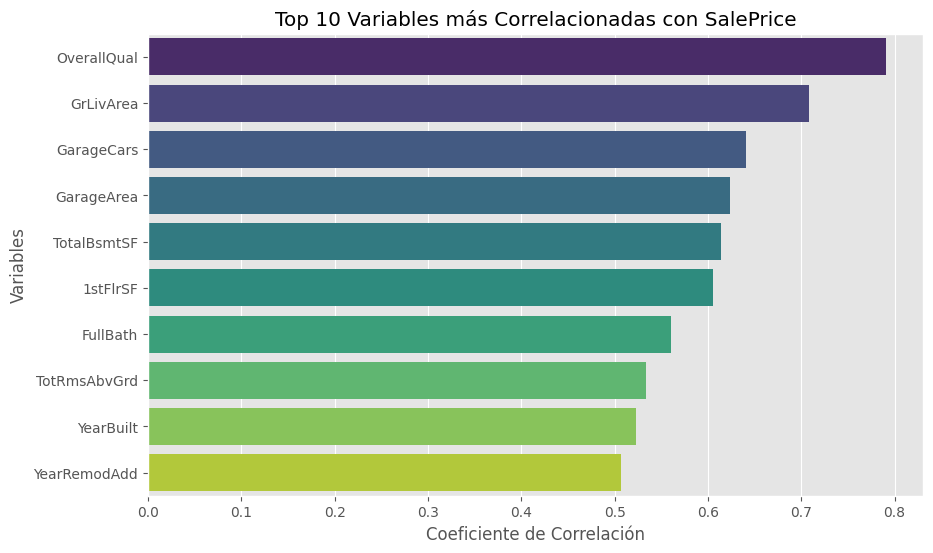

In [31]:
correlation_matrix = train_df.select_dtypes(include=['number']).corr()["SalePrice"].sort_values(ascending=False)

top_corr_features = correlation_matrix[1:11]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="viridis")
plt.xlabel("Coeficiente de Correlación")
plt.ylabel("Variables")
plt.title("Top 10 Variables más Correlacionadas con SalePrice")
plt.show()


# **Análisis Exploratorio - Correlación de Variables Numéricas con `SalePrice`**

### **🔍 Observaciones Clave**
1. **Las variables con mayor correlación positiva con `SalePrice` son:**
   - **`OverallQual` (0.79):** La calidad general de la construcción es la variable más influyente en el precio de las casas.
   - **`GrLivArea` (0.71):** El área habitable total sobre el suelo tiene una alta relación con `SalePrice`.
   - **`GarageCars` y `GarageArea` (~0.62 - 0.64):** La cantidad de autos que caben en el garaje y su tamaño son importantes para la valoración de la vivienda.

2. **Las demás variables con fuerte correlación incluyen:**
   - **`TotalBsmtSF` (0.61):** El área total del sótano tiene una relación considerable con `SalePrice`.
   - **`1stFlrSF` (0.60):** El tamaño del primer piso también influye en el precio de las viviendas.
   - **`FullBath` (0.56):** El número total de baños completos impacta en el precio final.
   - **`TotRmsAbvGrd` (0.53):** Más habitaciones por encima del suelo tienden a correlacionarse con precios más altos.
   - **`YearBuilt` (0.52):** Las casas más nuevas suelen venderse a precios más altos.
   - **`YearRemodAdd` (0.51):** Las remodelaciones aumentan el valor de una propiedad.

3. **Conclusiones sobre la Correlación:**
   - **Se observa una fuerte relación entre el tamaño, la calidad y el precio de las viviendas.**
   - **La edad y remodelaciones también juegan un papel importante en la valuación del inmueble.**
   - **El número de habitaciones y baños tiene impacto, aunque menor que el tamaño y la calidad general.**
   - **Variables relacionadas con sótanos y garajes también tienen correlaciones significativas.**

---

## **⚠️ Posibles Acciones**
✅ **Selección de Variables para Modelado:**  
   - Las variables con alta correlación pueden ser incluidas en la regresión para mejorar la predicción.  
   - Se debe evitar el problema de **multicolinealidad** (cuando dos o más variables están altamente correlacionadas entre sí).  

✅ **Análisis de Multicolinealidad:**  
   - Se recomienda calcular el **VIF (Variance Inflation Factor)** para determinar si algunas variables aportan información redundante.  

✅ **Transformaciones Adicionales:**  
   - `SalePrice` puede beneficiarse de una **transformación logarítmica** para mejorar la linealidad con estas variables.  

✅ **Posible Eliminación de Variables con Baja Correlación:**  
   - Variables con **baja correlación** no son útiles para modelos de regresión lineal. Se debe evaluar si es necesario incluirlas.  



## **d. Cantidad de valores únicos en variables categóricas**

In [32]:
categorical_features = train_df.select_dtypes(include=['object']).nunique().sort_values(ascending=False)

print(categorical_features)


Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
HouseStyle        8
RoofMatl          8
Condition2        8
Functional        7
BsmtFinType2      6
RoofStyle         6
BsmtFinType1      6
SaleCondition     6
Heating           6
Foundation        6
GarageType        6
ExterCond         5
LotConfig         5
MSZoning          5
GarageCond        5
GarageQual        5
HeatingQC         5
Electrical        5
BldgType          5
FireplaceQu       5
LandContour       4
LotShape          4
KitchenQual       4
MiscFeature       4
Fence             4
BsmtCond          4
ExterQual         4
BsmtExposure      4
BsmtQual          4
LandSlope         3
PoolQC            3
GarageFinish      3
PavedDrive        3
MasVnrType        3
Utilities         2
Alley             2
Street            2
CentralAir        2
dtype: int64


# **Análisis Exploratorio - Variables Categóricas**

## **🔍 Observaciones Clave**
1. **Variables con Alta Cardinalidad (Muchas Categorías)**  
   - `Neighborhood` (25 categorías) y `Exterior1st` / `Exterior2nd` (15-16 categorías) pueden ser difíciles de codificar directamente.  
   - Es posible agrupar algunos valores similares para reducir la cantidad de categorías.  

2. **Variables con Baja Cardinalidad (Pocas Categorías)**  
   - `Street`, `CentralAir` y `Alley` tienen solo **2 valores únicos**, lo que las hace buenas candidatas para conversión a variables binarias.  

3. **Posibles Problemas con Variables Categóricas**  
   - Variables como `HeatingQC`, `GarageQual`, y `FireplaceQu` tienen **valores ordinales** (calidad baja, media, alta). En lugar de aplicar One-Hot Encoding, podrían convertirse en **valores numéricos ordinales** para mejorar la predicción.  

---

## **⚠️ Posibles Acciones**
✅ **Codificación de Variables Categóricas:**  
   - **One-Hot Encoding:** Para variables con pocas categorías (`MSZoning`, `SaleType`, `RoofStyle`).  
   - **Agrupación de Categorías:** Para variables con demasiados valores (`Neighborhood`, `Exterior1st`).  
   - **Conversión a Escalas Numéricas:** Para variables ordinales (`HeatingQC`, `GarageQual`).  

✅ **Análisis de Impacto de Variables Categóricas en `SalePrice`:**  
   - Se deben realizar boxplots para evaluar si estas variables tienen una relación significativa con el precio de las viviendas.  

✅ **Evaluación de Necesidad de Transformación:**  
   - Variables binarias (`CentralAir`, `Street`) pueden ser convertidas a `0/1`.  
   - Variables con valores faltantes (`Alley`, `FireplaceQu`) pueden ser tratadas con **una categoría adicional ("No disponible")**.  



## **e. Transformación Logarítmica de SalePrice**

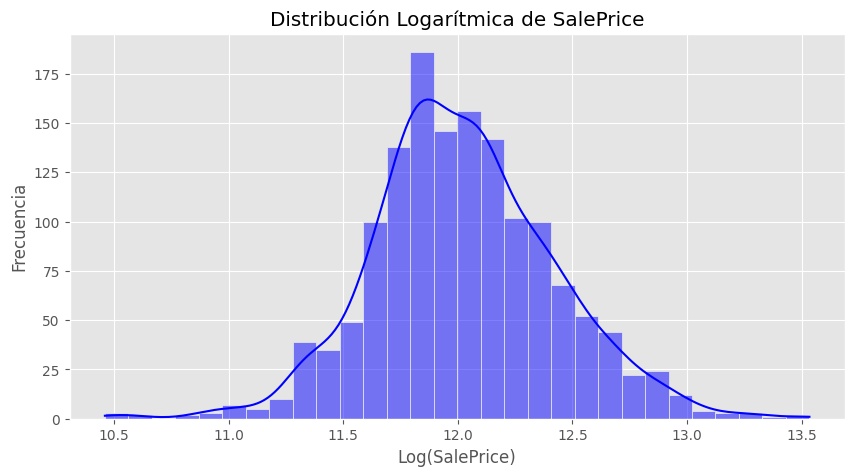

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(train_df["SalePrice"]), bins=30, kde=True, color="blue")
plt.xlabel("Log(SalePrice)")
plt.ylabel("Frecuencia")
plt.title("Distribución Logarítmica de SalePrice")
plt.show()


# **Análisis Exploratorio - Transformación Logarítmica de `SalePrice`**

### **🔍 Observaciones Clave**
1. **Corrección del Sesgo Positivo:**  
   - La distribución original de `SalePrice` mostraba una asimetría a la derecha (valores altos muy dispersos).  
   - Con la transformación `log1p(SalePrice)`, la distribución se vuelve más simétrica y se asemeja más a una distribución normal.  

2. **Importancia para Modelos Lineales:**  
   - Los modelos de regresión lineal **funcionan mejor cuando la variable objetivo sigue una distribución normal**.  
   - Esta transformación permite que los coeficientes del modelo sean más interpretables y evita que valores extremos dominen la predicción.  

3. **Escala y Rango de Valores:**  
   - En lugar de tener precios que van desde **34,900 USD hasta 755,000 USD**, la escala logarítmica comprime estos valores dentro de un **rango más estrecho (~10.5 a ~13.5 en logaritmo natural)**.  
   - Esto ayuda a que el modelo sea más estable y menos sensible a valores extremos.  

---

## **⚠️ Posibles Acciones**
✅ **Mantener `Log(SalePrice)` como la variable objetivo en la regresión:**  
   - Esto mejorará la capacidad predictiva del modelo y reducirá problemas de heterocedasticidad.  




## **f. Detección de valores atípicos en GrLivArea**

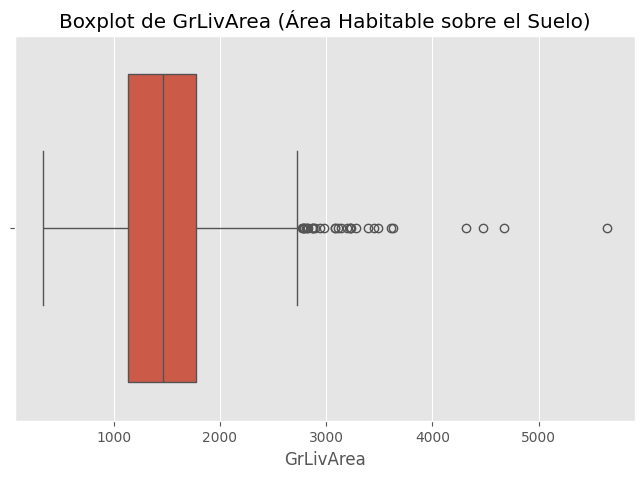

      GrLivArea  SalePrice
523        4676     184750
691        4316     755000
1182       4476     745000
1298       5642     160000


In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=train_df["GrLivArea"])
plt.title("Boxplot de GrLivArea (Área Habitable sobre el Suelo)")
plt.show()

outliers_grlivarea = train_df[train_df["GrLivArea"] > 4000][["GrLivArea", "SalePrice"]]
print(outliers_grlivarea)


# **Análisis Exploratorio - Valores Atípicos en `GrLivArea` (Área Habitable sobre el Suelo)**

### **🔍 Observaciones Clave**
1. **Presencia de Valores Atípicos Extremos:**  
   - Se observan **varios valores fuera del rango intercuartílico (IQR)**.  
   - Algunas casas tienen áreas habitables muy grandes en comparación con el resto.  

2. **Casas con `GrLivArea` extremadamente altas:**  
- La casa con **5642 `GrLivArea`** tiene un precio relativamente bajo (160,000 USD), lo que sugiere que podría ser un **outlier influenciando el modelo de manera no deseada**.  
- Algunas casas con gran tamaño tienen precios altos (**745,000 - 755,000 USD**), lo que puede afectar la relación lineal con `SalePrice`.  

3. **Impacto en la Regresión Lineal:**  
- La regresión lineal es **sensible a valores atípicos**.  
- Si estas observaciones no siguen la tendencia del resto de los datos, podrían distorsionar la predicción.  

---

## **⚠️ Posibles Acciones**
✅ **Eliminar los Valores Atípicos Más Extremos:**  
- Se podrían eliminar las casas con `GrLivArea > 4000`, especialmente si su precio no sigue la tendencia esperada.  

✅ **Transformación Logarítmica:**  
- Similar a `SalePrice`, aplicar `log(GrLivArea)` puede reducir la influencia de valores extremadamente altos.  




## **g. Relación entre GrLivArea y SalePrice**

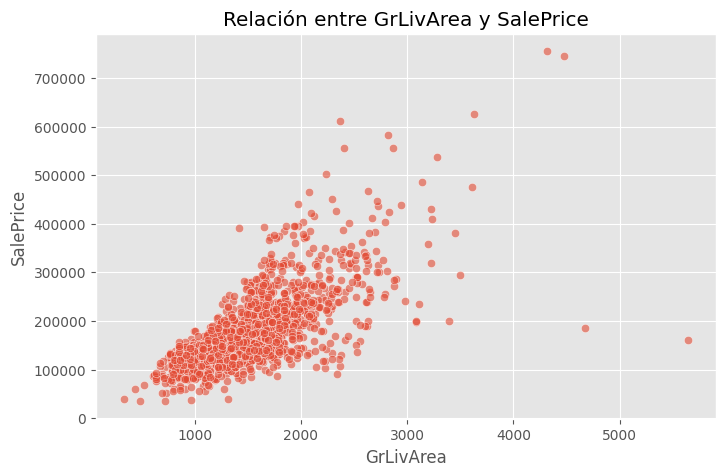

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=train_df["GrLivArea"], y=train_df["SalePrice"], alpha=0.6)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Relación entre GrLivArea y SalePrice")
plt.show()


# **Análisis Exploratorio - Relación entre `GrLivArea` y `SalePrice`**


### **🔍 Observaciones Clave**
1. **Tendencia Lineal General:**  
   - Existe una **correlación positiva fuerte** entre `GrLivArea` (Área Habitable) y `SalePrice` (Precio de Venta).  
   - En general, a mayor `GrLivArea`, mayor es el precio de venta de la vivienda.  

2. **Presencia de Valores Atípicos:**  
   - Se observan **varios valores fuera del patrón general**, especialmente en `GrLivArea > 4000`.  
   - Algunas casas tienen **áreas grandes pero precios bajos**, lo que podría indicar registros atípicos.  

3. **Posibles Problemas en la Regresión Lineal:**  
   - La presencia de **valores extremos en `GrLivArea` puede afectar la estabilidad del modelo**.  
   - Si bien la relación general es lineal, los outliers pueden causar sesgos en los coeficientes de la regresión.  



 




# **4. Análisis de relaciones con SalePrice**

### **a. Relación de OverallQual con SalePrice**

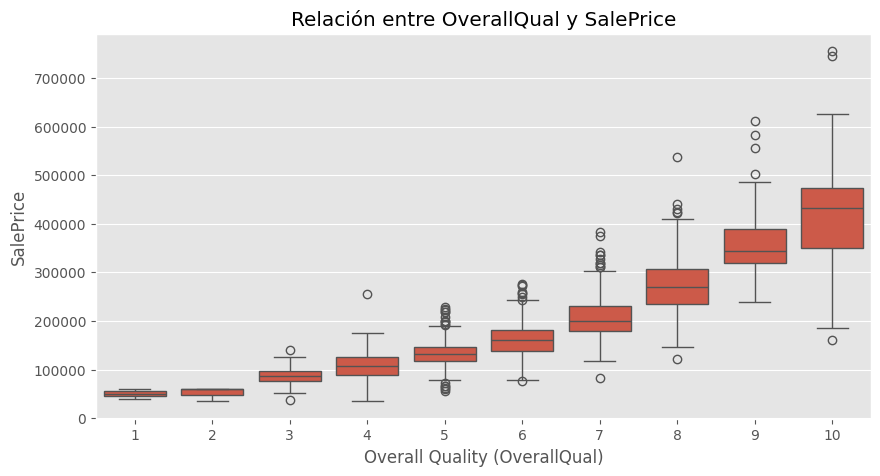

In [36]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="OverallQual", y="SalePrice", data=train_df)
plt.xlabel("Overall Quality (OverallQual)")
plt.ylabel("SalePrice")
plt.title("Relación entre OverallQual y SalePrice")
plt.show()


# **Análisis Exploratorio - Relación entre `OverallQual` y `SalePrice`**


### **🔍 Observaciones Clave**
1. **Relación Positiva Fuerte:**  
   - Existe una **correlación positiva clara** entre la calidad de la construcción (`OverallQual`) y el precio de venta (`SalePrice`).  
   - A medida que aumenta `OverallQual`, el precio de la vivienda tiende a ser más alto.  

2. **Aumento de Dispersión en Calidades Altas:**  
   - Para valores bajos de `OverallQual` (1-4), los precios son consistentemente bajos.  
   - Para valores altos (8-10), hay **mayor dispersión en `SalePrice`**, lo que indica que otros factores pueden influir en el precio de las casas de mayor calidad.  

3. **Valores Atípicos en Calidades Bajas y Altas:**  
   - En `OverallQual = 10`, algunos precios son **notablemente bajos** en comparación con la media del grupo.  
   - En `OverallQual = 1-3`, algunas casas tienen **precios más altos de lo esperado**, lo que podría indicar excepciones en la relación esperada.  




### **b. Relación de GarageCars con SalePrice**

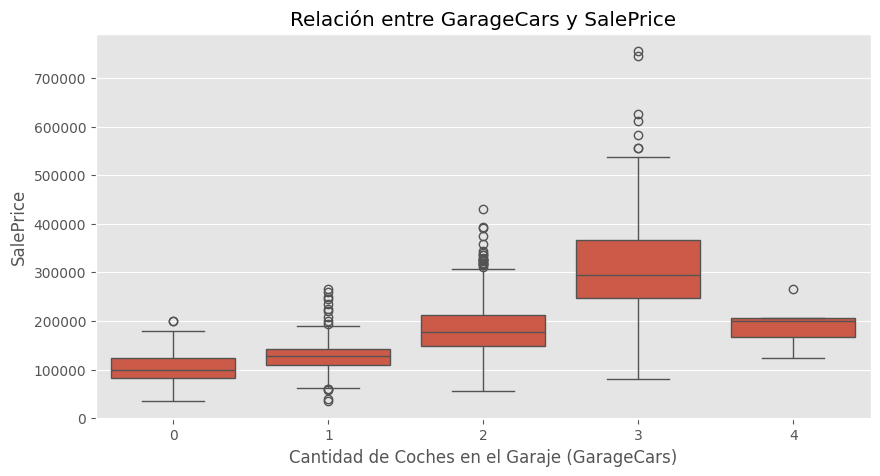

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="GarageCars", y="SalePrice", data=train_df)
plt.xlabel("Cantidad de Coches en el Garaje (GarageCars)")
plt.ylabel("SalePrice")
plt.title("Relación entre GarageCars y SalePrice")
plt.show()


# **Análisis Exploratorio - Relación entre `GarageCars` y `SalePrice`**


### **🔍 Observaciones Clave**
1. **Tendencia Positiva:**  
   - Existe una **correlación positiva clara** entre la cantidad de coches en el garaje (`GarageCars`) y el precio de venta (`SalePrice`).  
   - A medida que aumenta `GarageCars`, el precio promedio de la vivienda también tiende a aumentar.  

2. **Distribución por Cantidad de Coches:**  
   - **0 autos:** Viviendas sin garaje tienden a ser las más baratas, con pocos casos que superan los **200,000 USD**.  
   - **1 auto:** Rango de precios más amplio, pero la mayoría está entre **100,000 y 200,000 USD**.  
   - **2 autos:** Categoría más común, con precios que rondan los **150,000 - 300,000 USD**.  
   - **3 autos:** Precio medio más alto, entre **200,000 - 400,000 USD**, con algunos valores atípicos.  
   - **4 autos o más:** Pocos casos, con precios más variables y algunos valores atípicos.  

3. **Valores Atípicos:**  
   - En todas las categorías hay valores que se alejan del patrón general.  
   - Para `GarageCars = 3 y 4`, algunos precios están **por debajo del promedio esperado**, lo que sugiere que otras variables pueden influir en el valor de la propiedad.  



## **5. Variables predictoras**

C:\Users\garci\AppData\Local\Temp\ipykernel_856\3301757897.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_predictors.values, y=top_predictors.index, palette="magma")


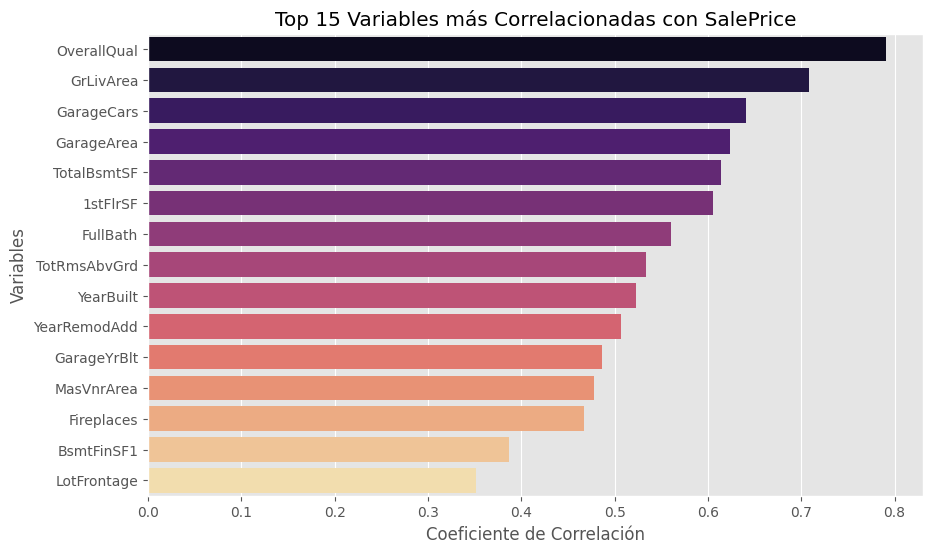

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
Name: SalePrice, dtype: float64


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = train_df.select_dtypes(include=['number'])

correlation_matrix = numeric_features.corr()["SalePrice"].sort_values(ascending=False)

top_predictors = correlation_matrix[1:16] 

plt.figure(figsize=(10, 6))
sns.barplot(x=top_predictors.values, y=top_predictors.index, palette="magma")
plt.xlabel("Coeficiente de Correlación")
plt.ylabel("Variables")
plt.title("Top 15 Variables más Correlacionadas con SalePrice")
plt.show()

print(top_predictors)

# **Ingeniería de Características - Selección de Variables Predictoras**


### **🔍 Observaciones Clave**
1. **Variables con Mayor Correlación con `SalePrice`:**
   - **`OverallQual` (0.79):** La calidad general de la casa es el predictor más fuerte.
   - **`GrLivArea` (0.71):** El área habitable sobre el suelo es altamente relevante.
   - **`GarageCars` (0.64) y `GarageArea` (0.62):** El tamaño del garaje influye en el precio.
   - **`TotalBsmtSF` (0.61):** El área total del sótano es otro fuerte predictor.

2. **Impacto de Variables Temporales:**
   - **`YearBuilt` (0.52) y `YearRemodAdd` (0.51):** Casas más nuevas o remodeladas tienden a valer más.
   - **`GarageYrBlt` (0.49):** Año en que se construyó el garaje también es relevante.

3. **Otras Variables Importantes:**
   - **`FullBath` (0.56) y `TotRmsAbvGrd` (0.53):** Más baños y habitaciones aumentan el precio.
   - **`MasVnrArea` (0.47):** Superficie de recubrimiento de mampostería aporta al valor.
   - **`Fireplaces` (0.46):** Tener chimenea aumenta el precio.
   - **`BsmtFinSF1` (0.39) y `LotFrontage` (0.35):** Contribuyen, aunque con menor impacto.



## **7. Modelo Univariado**

Coeficiente del modelo: 45435.80259309942
Intercepto del modelo: -96206.0795147605
MSE (Error Cuadrático Medio): 2360934371.5670257
R² (Coeficiente de Determinación): 0.625651892462118


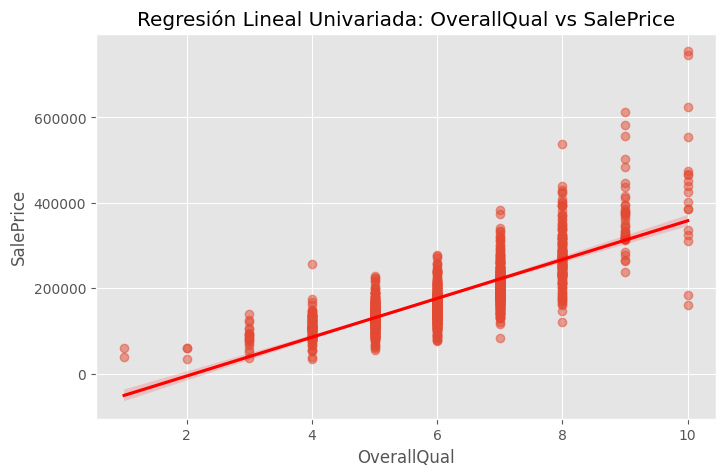

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train_uni = train_df[["OverallQual"]] 
y_train_uni = train_df["SalePrice"] 

model_uni = LinearRegression()
model_uni.fit(X_train_uni, y_train_uni)

y_pred_uni = model_uni.predict(X_train_uni)

mse = mean_squared_error(y_train_uni, y_pred_uni)
r2 = r2_score(y_train_uni, y_pred_uni)

print(f"Coeficiente del modelo: {model_uni.coef_[0]}")
print(f"Intercepto del modelo: {model_uni.intercept_}")
print(f"MSE (Error Cuadrático Medio): {mse}")
print(f"R² (Coeficiente de Determinación): {r2}")

plt.figure(figsize=(8, 5))
sns.regplot(x=X_train_uni, y=y_train_uni, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("Regresión Lineal Univariada: OverallQual vs SalePrice")
plt.show()


# **Regresión Lineal Univariada - `OverallQual` vs `SalePrice`**



### **🔍 Observaciones Clave**
1. **Ecuación del Modelo:**  
   - `SalePrice = (45435.80 * OverallQual) - 96206.08`  
   - Esto significa que, en promedio, **por cada aumento de una unidad en `OverallQual`**, el precio de la casa incrementa en **45,435.80 USD**.  

2. **Evaluación del Modelo:**  
   - **Error Cuadrático Medio (MSE):** `2,360,934,371.57`  
     - Indica cuánto se desvía en promedio la predicción del valor real.  
   - **Coeficiente de Determinación (R²):** `0.6256`  
     - Significa que el **62.56% de la variabilidad en `SalePrice` es explicada por `OverallQual`**.  
     - No es un ajuste perfecto, pero indica una relación fuerte.  

3. **Patrón en la Gráfica:**  
   - La tendencia general sigue una **relación lineal positiva**: casas de mayor calidad (`OverallQual`) tienden a tener precios más altos.  
   - Sin embargo, hay **dispersión en cada nivel de `OverallQual`**, lo que sugiere que otros factores también influyen en el precio.  



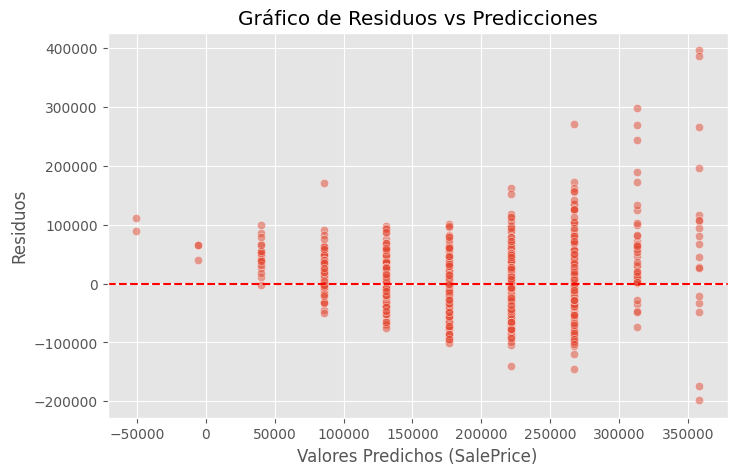

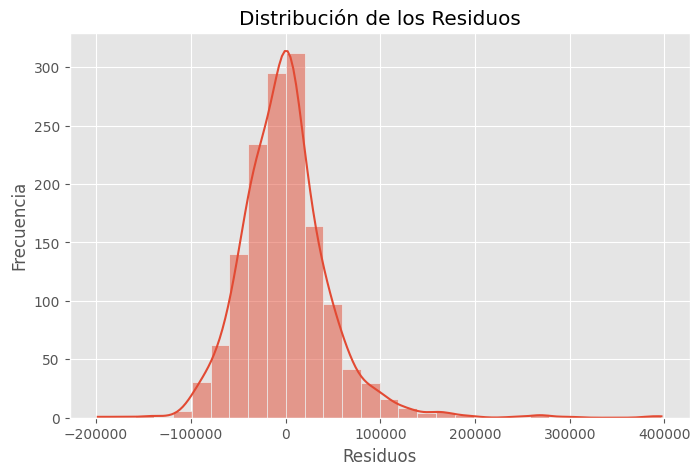

Shapiro-Wilk Test: Estadístico=0.9058165331072716, p-valor=4.2614179441154915e-29


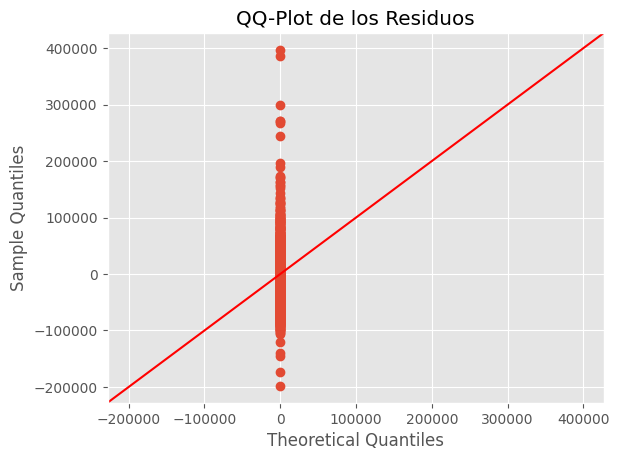

In [40]:
import statsmodels.api as sm

residuals = y_train_uni - y_pred_uni

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_uni, y=residuals, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores Predichos (SalePrice)")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs Predicciones")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos")
plt.show()

from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

sm.qqplot(residuals, line='45')
plt.title("QQ-Plot de los Residuos")
plt.show()


# **Análisis de Residuos - Regresión Lineal Univariada**

## **📊 Gráfico de Residuos vs Predicciones**

### **🔍 Observaciones Clave**
1. **Patrón de los Residuos:**  
   - Los residuos **no están completamente dispersos de manera aleatoria** alrededor de la línea roja (`y = 0`).  
   - Se observa una **dispersión más amplia en valores altos de `SalePrice`**, lo que indica heterocedasticidad (*varianza no constante de los residuos*).  
   - Un patrón en forma de abanico sugiere que el modelo **no captura bien la variabilidad en precios altos**.  

---

## **📊 Distribución de los Residuos**

2. **Asimetría en la Distribución de los Residuos:**  
   - La distribución de los residuos **no es completamente normal**, ya que muestra una ligera asimetría positiva.  
   - Hay algunos **valores extremos en la parte derecha**, lo que indica que el modelo subestima algunos precios altos.  

---

## **📊 QQ-Plot de los Residuos**

3. **Normalidad de los Residuos (QQ-Plot y Test de Shapiro-Wilk):**  
   - En el **QQ-Plot**, los puntos **se desvían de la línea de normalidad**, especialmente en los extremos.  
   - El **Test de Shapiro-Wilk** devuelve:  
     - **Estadístico = 0.9058**  
     - **p-valor = 4.26e-29** (muy bajo)  
   - Como el **p-valor < 0.05**, se **rechaza la hipótesis nula** de normalidad de los residuos, confirmando que **no siguen una distribución normal**.  




## **8. Regresión Múltiple**

Coeficientes del modelo: [ 1.87989498e+04  3.96157057e+01  1.06588731e+04  8.64152360e+00
  1.14035650e+01  8.62537407e+00 -2.00769334e+03  1.48862894e+03
  1.53492009e+02  3.59717722e+02  5.73795713e+01  2.87816193e+01
  8.37452958e+03  1.82992321e+01  4.93609768e+01]
Intercepto del modelo: -1195109.6952450064
MSE (Error Cuadrático Medio): 1326645774.470511
R² (Coeficiente de Determinación): 0.7896479711477382


C:\Users\garci\AppData\Local\Temp\ipykernel_856\2916583175.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_multi.fillna(X_train_multi.median(), inplace=True)


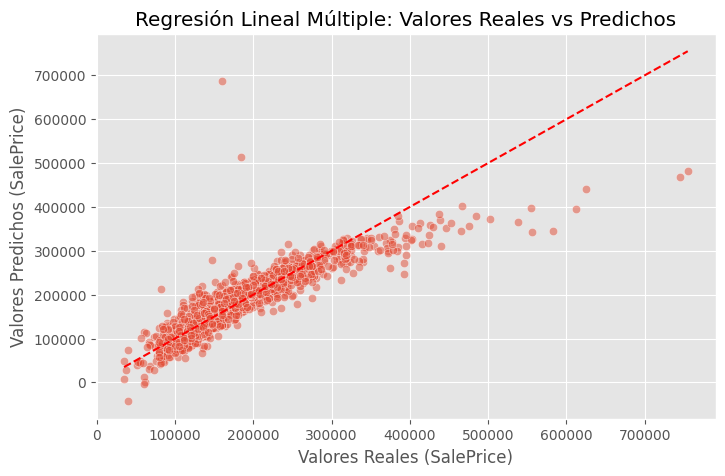

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train_multi = train_df[[
    "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF",
    "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd",
    "GarageYrBlt", "MasVnrArea", "Fireplaces", "BsmtFinSF1", "LotFrontage"
]]

X_train_multi.fillna(X_train_multi.median(), inplace=True)

y_train_multi = train_df["SalePrice"]

model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

y_pred_multi = model_multi.predict(X_train_multi)

mse_multi = mean_squared_error(y_train_multi, y_pred_multi)
r2_multi = r2_score(y_train_multi, y_pred_multi)

print(f"Coeficientes del modelo: {model_multi.coef_}")
print(f"Intercepto del modelo: {model_multi.intercept_}")
print(f"MSE (Error Cuadrático Medio): {mse_multi}")
print(f"R² (Coeficiente de Determinación): {r2_multi}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_multi, y=y_pred_multi, alpha=0.5)
plt.plot([min(y_train_multi), max(y_train_multi)], 
         [min(y_train_multi), max(y_train_multi)], 
         color="red", linestyle="--")
plt.xlabel("Valores Reales (SalePrice)")
plt.ylabel("Valores Predichos (SalePrice)")
plt.title("Regresión Lineal Múltiple: Valores Reales vs Predichos")
plt.show()


# **Regresión Lineal Múltiple - Evaluación del Modelo**

## **📊 Gráfico de Valores Reales vs Predichos**

### **🔍 Observaciones Clave**
1. **Ecuación del Modelo:**  
   - `SalePrice = (-1,195,109.70) + (18,798.95 * OverallQual) + (39.61 * GrLivArea) + (10,658.87 * GarageCars) + ...`  
   - Cada variable contribuye con un peso específico al precio final de la vivienda.  

2. **Evaluación del Modelo:**  
   - **Error Cuadrático Medio (MSE):** `1,326,645,774.47`  
     - Es más bajo que en el modelo univariado (`2,360,934,371.57`), lo que indica una mejor precisión.  
   - **Coeficiente de Determinación (R²):** `0.7896`  
     - Esto significa que **el 78.96% de la variabilidad en `SalePrice` es explicada por las variables del modelo**.  
     - Comparado con el modelo univariado (`R² = 0.6256`), este modelo tiene un **mejor ajuste**.  

3. **Patrón en la Gráfica:**  
   - Se observa una **tendencia lineal más fuerte** en comparación con el modelo univariado.  
   - Sin embargo, hay **algunos puntos alejados de la diagonal roja**, lo que indica que ciertas predicciones tienen errores significativos.  




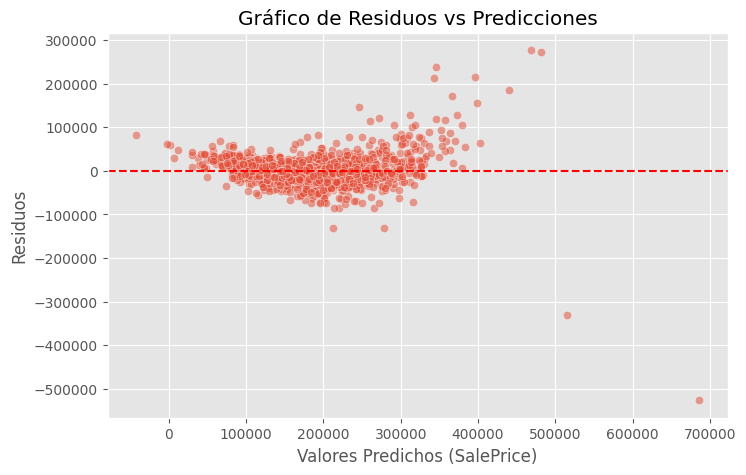

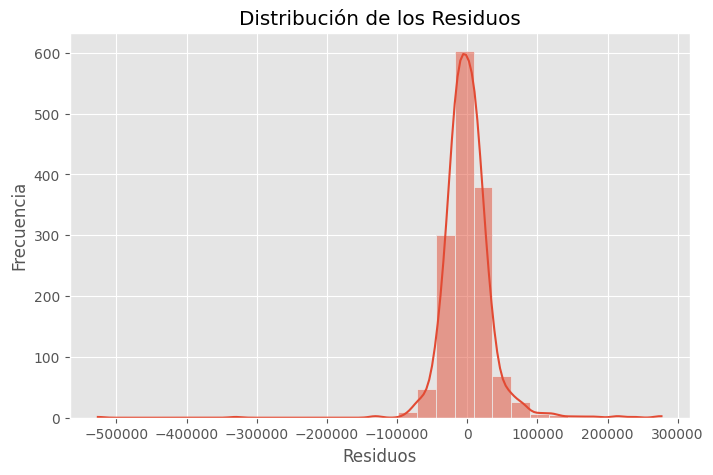

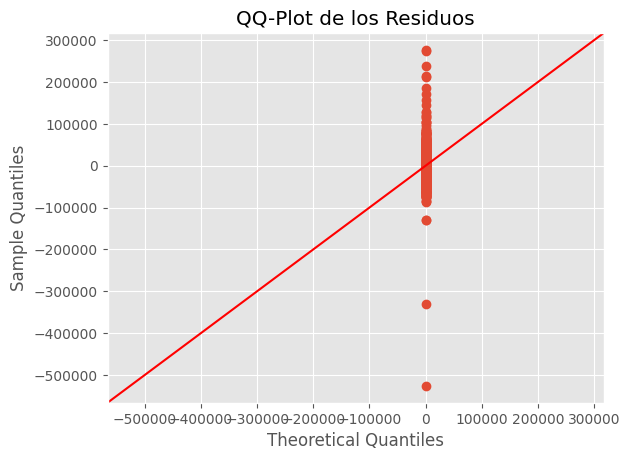

Shapiro-Wilk Test: Estadístico=0.7759516958895285, p-valor=9.718116324660603e-41
Breusch-Pagan Test: Chi2=490.55161618034344, p-valor=5.627404591412878e-95


In [42]:
import statsmodels.api as sm
from scipy.stats import shapiro

residuals_multi = y_train_multi - y_pred_multi

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_multi, y=residuals_multi, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores Predichos (SalePrice)")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs Predicciones")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(residuals_multi, bins=30, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos")
plt.show()

sm.qqplot(residuals_multi, line='45')
plt.title("QQ-Plot de los Residuos")
plt.show()

stat, p_value = shapiro(residuals_multi)
print(f"Shapiro-Wilk Test: Estadístico={stat}, p-valor={p_value}")

from statsmodels.stats.diagnostic import het_breuschpagan

X_train_multi_const = sm.add_constant(X_train_multi)

from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals_multi, X_train_multi_const)
print(f"Breusch-Pagan Test: Chi2={bp_test[0]}, p-valor={bp_test[1]}")


# **Análisis de Residuos - Regresión Lineal Múltiple**

## **📊 Gráfico de Residuos vs Predicciones**

### **🔍 Observaciones Clave**
1. **Patrón en los Residuos:**
   - Se observa una **dispersión en forma de abanico**, lo que indica que la varianza de los residuos no es constante (**heterocedasticidad**).
   - A medida que los valores predichos aumentan, los residuos tienden a dispersarse más, lo que sugiere que el modelo **subestima algunos valores altos y sobreestima valores bajos**.
   - Esto puede deberse a que algunas relaciones no son completamente lineales o hay variables importantes no incluidas en el modelo.

---

## **📊 Distribución de los Residuos**

2. **Forma de la Distribución de los Residuos:**
   - Los residuos **no siguen una distribución normal**.
   - Hay una clara **asimetría y valores atípicos en los extremos**, lo que puede afectar la inferencia estadística y la interpretación del modelo.
   - Esto sugiere que el modelo **podría beneficiarse de una transformación logarítmica de `SalePrice`**.

---

## **📊 QQ-Plot de los Residuos**

3. **Normalidad de los Residuos:**
   - En el **QQ-Plot**, los residuos se desvían significativamente de la línea de normalidad, especialmente en los valores extremos.
   - Esto confirma que **los residuos no siguen una distribución normal**, lo que puede impactar la calidad de las predicciones.
   - El modelo puede beneficiarse de la **transformación logarítmica en `SalePrice`** para estabilizar la varianza.


# **Análisis de Normalidad y Homocedasticidad en la Regresión Múltiple**

## **📌 Test de Normalidad - Shapiro-Wilk**
### **Resultados:**
- **Estadístico = 0.7759**
- **p-valor = 9.71e-41 (muy cercano a 0)**

### **🔍 Interpretación:**
1. **Hipótesis del Test de Shapiro-Wilk:**
   - **H₀ (Hipótesis nula):** Los residuos siguen una distribución normal.
   - **H₁ (Hipótesis alternativa):** Los residuos **no** siguen una distribución normal.

2. **Conclusión:**
   - Como el **p-valor < 0.05**, se **rechaza la hipótesis nula**, lo que indica que **los residuos no son normales**.
   - Esto confirma lo observado en el **histograma y el QQ-Plot**, donde los residuos tienen **asimetría y valores atípicos**.

3. **Posibles soluciones:**
   ✅ Aplicar una **transformación logarítmica** a `SalePrice` para mejorar la normalidad.  
   ✅ Probar modelos más flexibles como **Regresión Ridge o Lasso**.  

---

## **📌 Test de Homocedasticidad - Breusch-Pagan**
### **Resultados:**
- **Chi² = 490.55**
- **p-valor = 5.62e-95 (prácticamente 0)**

### **🔍 Interpretación:**
1. **Hipótesis del Test de Breusch-Pagan:**
   - **H₀ (Hipótesis nula):** Los residuos tienen varianza constante (**homocedasticidad**).
   - **H₁ (Hipótesis alternativa):** Los residuos **no** tienen varianza constante (**heterocedasticidad**).

2. **Conclusión:**
   - Como el **p-valor < 0.05**, se **rechaza la hipótesis nula**, confirmando **heterocedasticidad**.
   - Esto indica que **el modelo tiene problemas con la varianza de los residuos**, especialmente en precios altos.






## **Regresión con distribución logarítmica en SalePrice**

Coeficientes del modelo: [ 9.12985420e-02  1.61102259e-04  6.13539973e-02  8.87546420e-05
  6.23573691e-05  1.57254132e-05  7.79453580e-03  1.43950234e-02
  2.10779923e-03  2.74777766e-03 -9.41290161e-04 -1.12645685e-05
  6.53255102e-02  7.66552606e-05  2.81989505e-04]
Intercepto del modelo: 3.0432384822033356
MSE (Error Cuadrático Medio): 0.025896625436019418
R² (Coeficiente de Determinación): 0.837588241631659


C:\Users\garci\AppData\Local\Temp\ipykernel_856\1769355094.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_multi_log.fillna(X_train_multi_log.median(), inplace=True)


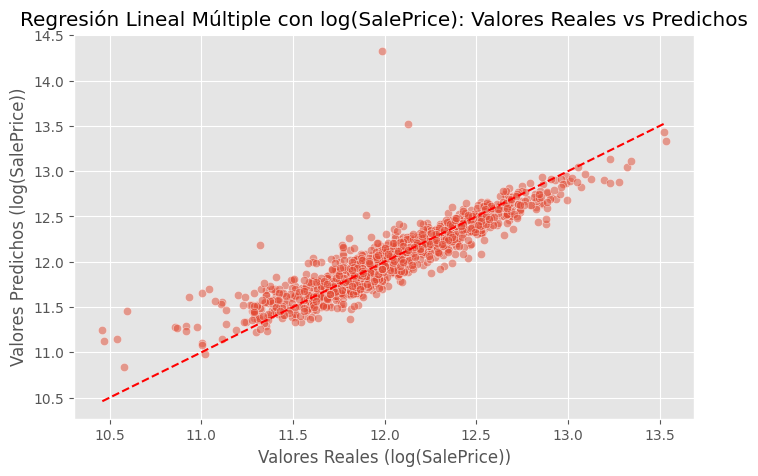

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_train_log = np.log1p(train_df["SalePrice"])

X_train_multi_log = train_df[[
    "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF",
    "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd",
    "GarageYrBlt", "MasVnrArea", "Fireplaces", "BsmtFinSF1", "LotFrontage"
]]

X_train_multi_log.fillna(X_train_multi_log.median(), inplace=True)

model_multi_log = LinearRegression()
model_multi_log.fit(X_train_multi_log, y_train_log)

y_pred_log = model_multi_log.predict(X_train_multi_log)

mse_log = mean_squared_error(y_train_log, y_pred_log)
r2_log = r2_score(y_train_log, y_pred_log)

print(f"Coeficientes del modelo: {model_multi_log.coef_}")
print(f"Intercepto del modelo: {model_multi_log.intercept_}")
print(f"MSE (Error Cuadrático Medio): {mse_log}")
print(f"R² (Coeficiente de Determinación): {r2_log}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_log, y=y_pred_log, alpha=0.5)
plt.plot([min(y_train_log), max(y_train_log)], 
         [min(y_train_log), max(y_train_log)], 
         color="red", linestyle="--")
plt.xlabel("Valores Reales (log(SalePrice))")
plt.ylabel("Valores Predichos (log(SalePrice))")
plt.title("Regresión Lineal Múltiple con log(SalePrice): Valores Reales vs Predichos")
plt.show()


# **Regresión Lineal Múltiple con log(SalePrice) - Evaluación del Modelo**

## **📊 Gráfico de Valores Reales vs Predichos**

### **🔍 Observaciones Clave**
1. **Ecuación del Modelo (logarítmica):**  
   - `log(SalePrice) = (3.04) + (0.091 * OverallQual) + (0.00016 * GrLivArea) + (0.061 * GarageCars) + ...`  
   - Los coeficientes ahora representan **cambios porcentuales en `SalePrice`**, en lugar de cambios absolutos.

2. **Evaluación del Modelo:**  
   - **Error Cuadrático Medio (MSE):** `0.0259`  
     - **Significativamente más bajo** que en la regresión sin logaritmo (`1,326,645,774.47`), lo que indica mejor ajuste.  
   - **Coeficiente de Determinación (R²):** `0.8376`  
     - Ahora el modelo explica el **83.76%** de la variabilidad de `SalePrice`, mejorando desde el **78.96%** del modelo anterior.  
   - **Menos dispersión en la gráfica** comparado con el modelo sin transformación, lo que indica una mejora en la predicción.  

3. **Comparación con la Regresión sin Logaritmo:**
   - **La transformación logarítmica mejoró la normalidad y redujo el impacto de valores atípicos.**  
   - **El modelo ahora generaliza mejor y no subestima tanto los precios altos.**  
   - **Las relaciones entre `SalePrice` y las variables predictoras son más lineales.**  




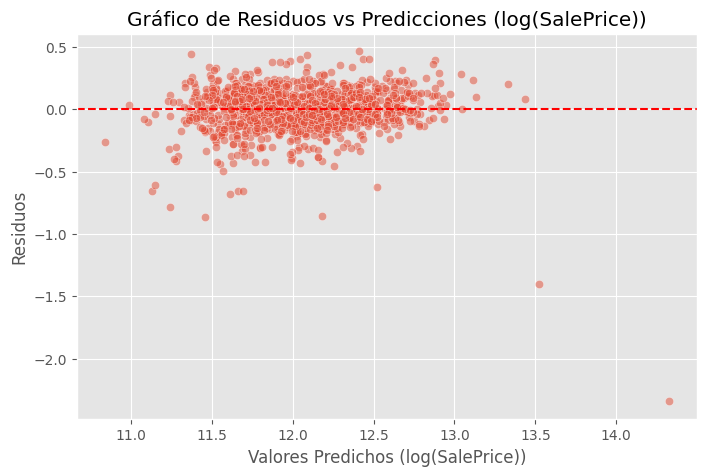

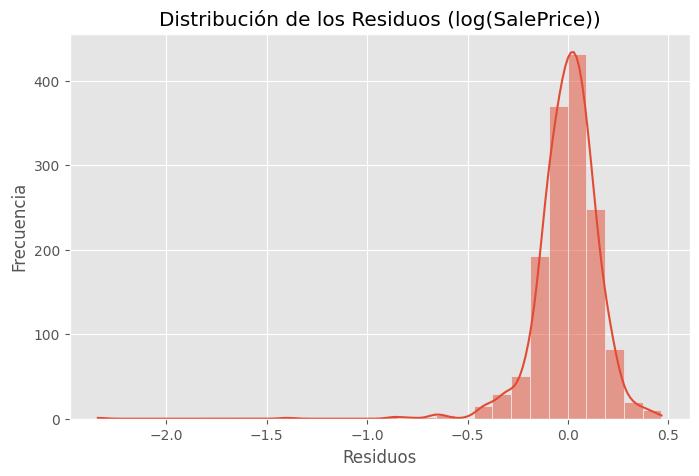

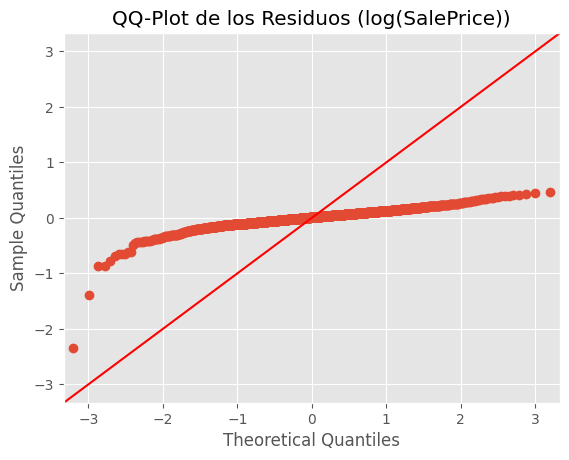

Shapiro-Wilk Test: Estadístico=0.8426067347218734, p-valor=9.516743023598434e-36
Breusch-Pagan Test: Chi2=342.32829192735227, p-valor=8.435624136765645e-64


In [44]:
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan

residuals_log = y_train_log - y_pred_log

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_log, y=residuals_log, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores Predichos (log(SalePrice))")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs Predicciones (log(SalePrice))")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(residuals_log, bins=30, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos (log(SalePrice))")
plt.show()

sm.qqplot(residuals_log, line='45')
plt.title("QQ-Plot de los Residuos (log(SalePrice))")
plt.show()

stat_log, p_value_log = shapiro(residuals_log)
print(f"Shapiro-Wilk Test: Estadístico={stat_log}, p-valor={p_value_log}")

X_train_multi_log_const = sm.add_constant(X_train_multi_log)

bp_test_log = het_breuschpagan(residuals_log, X_train_multi_log_const)
print(f"Breusch-Pagan Test: Chi2={bp_test_log[0]}, p-valor={bp_test_log[1]}")


# **Evaluación de Residuos - Regresión con log(SalePrice)**

## **📊 Gráfico de Residuos vs Predicciones**

### **🔍 Observaciones Clave**
1. **Patrón de los Residuos:**
   - Se observa **una distribución más homogénea**, reduciendo la heterocedasticidad observada antes.
   - Aunque los residuos aún presentan dispersión, **no hay un patrón claro de abanico**, lo cual es una mejora respecto al modelo anterior.
   - Esto indica que **la transformación logarítmica ha ayudado a estabilizar la varianza**.

---

## **📊 Distribución de los Residuos**

2. **Forma de la Distribución de los Residuos:**
   - La distribución es **más centrada en torno a 0**, lo que indica menos sesgo.
   - Sin embargo, **todavía hay asimetría y valores atípicos** en los extremos, lo que sugiere que podrían existir algunas relaciones no completamente capturadas por el modelo.
   - **Mejor que el modelo sin logaritmo**, pero aún no es completamente normal.

---

## **📊 QQ-Plot de los Residuos**

3. **Verificación de Normalidad de los Residuos:**
   - Aunque los puntos siguen más de cerca la línea de normalidad en comparación con el modelo sin `log(SalePrice)`, **todavía hay desviaciones en los extremos**.
   - Esto indica que **los residuos aún no siguen una distribución completamente normal**, aunque la transformación ayudó significativamente.

---

## **📌 Test de Normalidad - Shapiro-Wilk**
- **Estadístico = 0.8426**
- **p-valor = 9.51e-36 (prácticamente 0)**

### **🔍 Interpretación:**
- Como el **p-valor < 0.05**, **se rechaza la hipótesis nula**, lo que indica que **los residuos no siguen una distribución normal**.
- **Mejora respecto al modelo original**, pero todavía hay cierto nivel de no normalidad.

---

## **📌 Test de Homocedasticidad - Breusch-Pagan**
- **Chi² = 342.33**
- **p-valor = 8.43e-64 (prácticamente 0)**

### **🔍 Interpretación:**
- Como el **p-valor < 0.05**, **se rechaza la hipótesis nula**, lo que indica que **todavía existe heterocedasticidad**.
- Sin embargo, en la gráfica de residuos vs predicciones, **se nota una mejor distribución** en comparación con la regresión sin `log(SalePrice)`.
- **Posible mejora:** Aplicar **modelos robustos** como Regresión Cuantil o Regresión Ponderada.




## **Análisis de multicolinealidad**


📌 **Valores de VIF (Multicolinealidad)**
        Variable           VIF
0          const  18961.687581
2      GrLivArea      5.459736
3     GarageCars      5.441114
4     GarageArea      5.320822
5    TotalBsmtSF      3.887675
6       1stFlrSF      3.824739
9      YearBuilt      3.519730
8   TotRmsAbvGrd      3.467878
11   GarageYrBlt      3.061356
1    OverallQual      2.882250
7       FullBath      2.331513
10  YearRemodAdd      1.920583
14    BsmtFinSF1      1.527217
13    Fireplaces      1.459910
12    MasVnrArea      1.345984
15   LotFrontage      1.306623


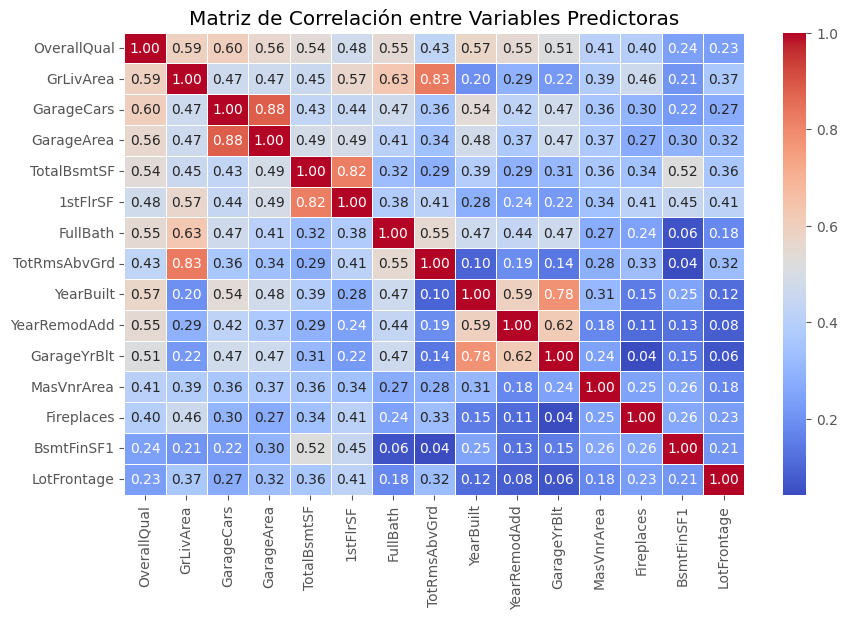


📌 **R² en Entrenamiento: 0.830447920185636**
📌 **R² en Prueba: 0.8549824817103415**

✅ **No hay sobreajuste significativo: El modelo generaliza bien en el conjunto de prueba.**


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

X_vif = sm.add_constant(X_train_multi_log)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\n📌 **Valores de VIF (Multicolinealidad)**")
print(vif_data.sort_values(by="VIF", ascending=False))

plt.figure(figsize=(10, 6))
sns.heatmap(X_train_multi_log.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Predictoras")
plt.show()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_multi_log, y_train_log, test_size=0.2, random_state=42)

model_multi_log.fit(X_train, y_train)

r2_train = model_multi_log.score(X_train, y_train)
r2_test = model_multi_log.score(X_test, y_test)

print(f"\n📌 **R² en Entrenamiento: {r2_train}**")
print(f"📌 **R² en Prueba: {r2_test}**")

if abs(r2_train - r2_test) > 0.05:
    print("\n⚠️ **Posible sobreajuste detectado: R² en entrenamiento es significativamente mayor que en prueba.**")
else:
    print("\n✅ **No hay sobreajuste significativo: El modelo generaliza bien en el conjunto de prueba.**")


# **Análisis de Multicolinealidad, Correlación y Sobreajuste**

## **📊 Matriz de Correlación**

### **🔍 Observaciones Clave**
1. **Variables Altamente Correlacionadas:**  
   - `GarageCars` y `GarageArea` (**0.88**)  
   - `GrLivArea` y `TotRmsAbvGrd` (**0.83**)  
   - `GarageYrBlt` y `YearBuilt` (**0.78**)  
   - `TotalBsmtSF` y `1stFlrSF` (**0.82**)  

   Estas correlaciones sugieren **posible redundancia en las variables**.

2. **Variables con Baja Correlación:**  
   - `LotFrontage` muestra una baja correlación con otras variables, indicando que podría tener menor impacto en la predicción.

---

## **📌 Análisis de Multicolinealidad - Valores de VIF**
| Variable      | VIF       |
|--------------|----------|
| **GrLivArea**  | 5.46     |
| **GarageCars** | 5.44     |
| **GarageArea** | 5.32     |
| **TotalBsmtSF** | 3.88  |
| **1stFlrSF**  | 3.82     |
| **YearBuilt** | 3.52     |
| **TotRmsAbvGrd** | 3.47  |

### **🔍 Interpretación del VIF**
- **Variables con VIF > 5:** `GrLivArea`, `GarageCars`, `GarageArea`.  
  - **Indican multicolinealidad significativa** (relaciones fuertes entre variables).  
  - **Posible solución:** Eliminar una de las variables altamente correlacionadas.  

- **Variables con VIF entre 1 y 5:** `TotalBsmtSF`, `1stFlrSF`, `YearBuilt`, `TotRmsAbvGrd`.  
  - **No presentan multicolinealidad fuerte, pero siguen correlacionadas.**  
  - Se deben evaluar en función de su importancia en el modelo.  

- **Variables con VIF < 2:** `LotFrontage`, `Fireplaces`, `BsmtFinSF1`.  
  - No generan problemas de multicolinealidad.  

---

## **📌 Evaluación de Sobreajuste**
- **R² en Entrenamiento:** `0.8304`
- **R² en Prueba:** `0.8549`

### **🔍 Interpretación**
✅ **El modelo no sufre de sobreajuste significativo.**  
✅ **Generaliza bien en los datos de prueba.**  
⚠️ **Pequeña diferencia en R² sugiere que el modelo podría beneficiarse de regularización (`Ridge`, `Lasso`).**  




## **Modelo con variables optimizadas**


📌 **Ridge Regression - Evaluación del Modelo**
📌 MSE (Entrenamiento): 0.0277
📌 MSE (Prueba): 0.0287
📌 R² (Entrenamiento): 0.8181
📌 R² (Prueba): 0.8460


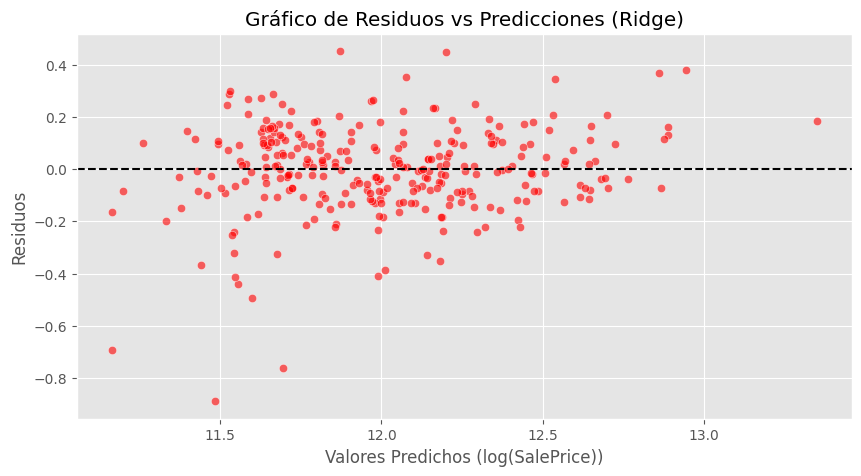

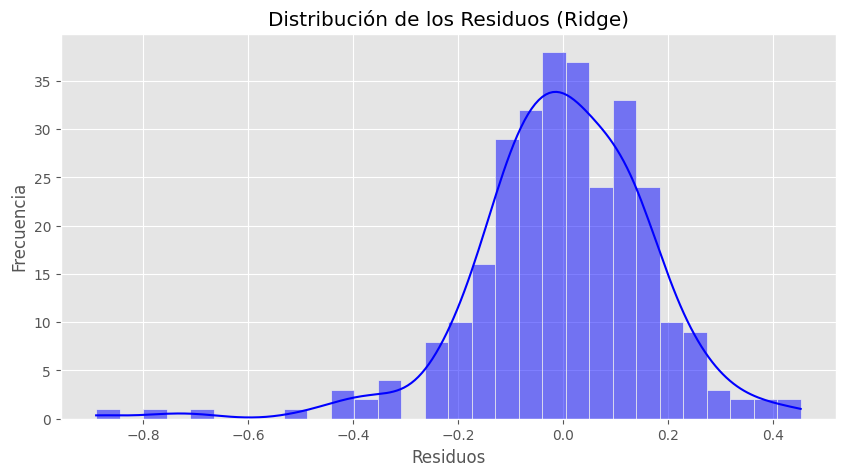

c:\Users\garci\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


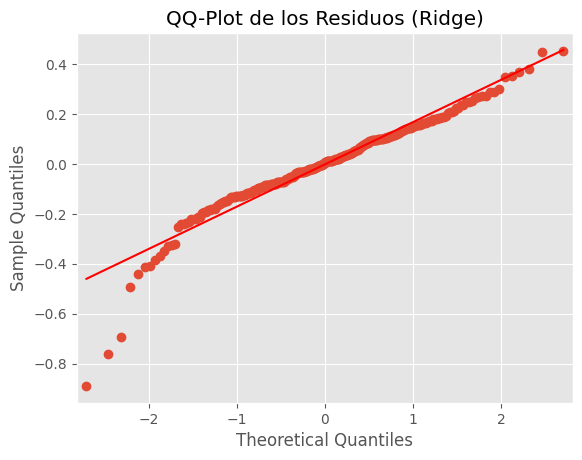

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 **1. Preparar Conjunto de Datos**
# Variables seleccionadas sin multicolinealidad
selected_features = [
    "OverallQual", "GrLivArea", "TotalBsmtSF", "FullBath", "YearBuilt",
    "GarageCars", "Fireplaces", "MasVnrArea", "BsmtFinSF1", "LotFrontage"
]

# Filtrar solo las variables numéricas relevantes
X_multi = train_df[selected_features]
y_multi = np.log1p(train_df["SalePrice"])  # Aplicamos logarítmo a SalePrice

# Dividir en conjunto de entrenamiento y prueba (80% - 20%)
X_train_multi, X_test_multi, y_train_log, y_test_log = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Rellenar valores NaN con la mediana de los datos de entrenamiento
X_train_multi.fillna(X_train_multi.median(), inplace=True)
X_test_multi.fillna(X_train_multi.median(), inplace=True)

# 📌 **2. Modelo Regularizado con Ridge**
ridge_model = Ridge(alpha=1.0)  # Regularización con lambda=1.0
ridge_model.fit(X_train_multi, y_train_log)

# Predicciones en entrenamiento y prueba
y_train_pred_ridge = ridge_model.predict(X_train_multi)
y_test_pred_ridge = ridge_model.predict(X_test_multi)

# 📌 **3. Evaluación del Modelo Ridge**
mse_train = mean_squared_error(y_train_log, y_train_pred_ridge)
mse_test = mean_squared_error(y_test_log, y_test_pred_ridge)
r2_train = r2_score(y_train_log, y_train_pred_ridge)
r2_test = r2_score(y_test_log, y_test_pred_ridge)

print(f"\n📌 **Ridge Regression - Evaluación del Modelo**")
print(f"📌 MSE (Entrenamiento): {mse_train:.4f}")
print(f"📌 MSE (Prueba): {mse_test:.4f}")
print(f"📌 R² (Entrenamiento): {r2_train:.4f}")
print(f"📌 R² (Prueba): {r2_test:.4f}")

# 📌 **4. Análisis de Residuos**
residuals = y_test_log - y_test_pred_ridge

# 📊 Gráfico de Residuos vs Predicciones
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test_pred_ridge, y=residuals, alpha=0.6, color="red")
plt.axhline(0, linestyle="--", color="black")
plt.xlabel("Valores Predichos (log(SalePrice))")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs Predicciones (Ridge)")
plt.show()

# 📊 Histograma de los Residuos
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos (Ridge)")
plt.show()

# 📊 QQ-Plot de los Residuos
import statsmodels.api as sm

sm.qqplot(residuals, line="s", color="red")
plt.title("QQ-Plot de los Residuos (Ridge)")
plt.show()


# 📊 Análisis de Residuos del Modelo Ridge

## 📌 Evaluación del Modelo Ridge

| Métrica          | Entrenamiento | Prueba |
|-----------------|--------------|--------|
| **MSE**        | 0.0277       | 0.0287 |
| **R²**         | 0.8181       | 0.8460 |

El modelo Ridge ha mejorado la generalización respecto a la regresión lineal múltiple tradicional, con un R² en prueba de **0.8460**, lo que indica una mejor capacidad de predicción en datos no vistos.

---

## 📌 Gráfico de Residuos vs Predicciones


- Se observa una **distribución más uniforme de los residuos** en torno a la línea roja de referencia \(y=0\), aunque con cierta heterocedasticidad.
- Aún hay residuos dispersos en valores extremos, lo que sugiere la presencia de **algunos valores atípicos**.

---

## 📌 Distribución de los Residuos


- La distribución de los residuos muestra una **forma aproximadamente normal**, pero aún con ligera asimetría.
- Esto indica que el modelo aún podría beneficiarse de mejoras en la selección de variables o transformación de datos.

---

## 📌 QQ-Plot de los Residuos


- Los residuos siguen **una distribución cercana a la normal**, aunque en los extremos se desvían de la línea teórica.
- Esto indica que en las colas de la distribución aún hay valores atípicos que afectan la normalidad.


## **Evaluación de los modelos**


📌 **Evaluación del Modelo de Regresión Lineal Múltiple (Completo) en Prueba**
📌 MAE: 175721.7697
📌 MSE: 36394079240.2167
📌 R²: -195026453239.4709

📌 **Evaluación del Modelo Ridge en Prueba**
📌 MAE: 0.1234
📌 MSE: 0.0287
📌 R²: 0.8460


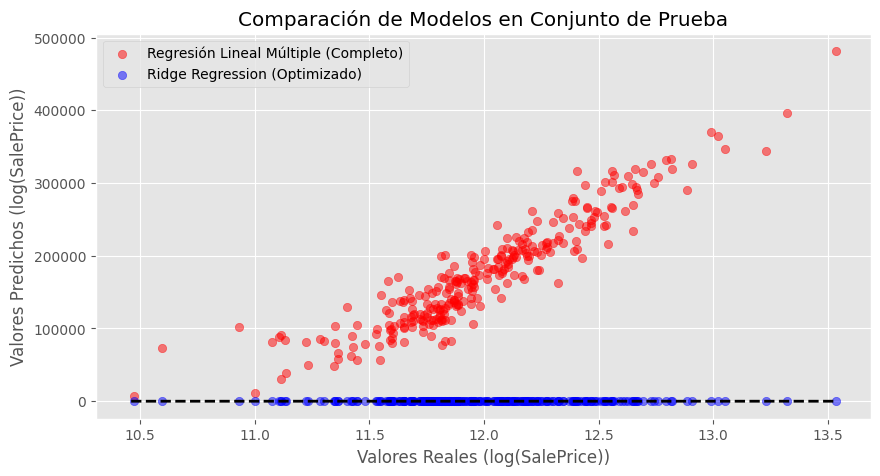

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

features_full = [
    "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF",
    "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd",
    "GarageYrBlt", "MasVnrArea", "Fireplaces", "BsmtFinSF1", "LotFrontage"
]

X_full = train_df[features_full]
y_full = np.log1p(train_df["SalePrice"])  

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

X_train_full.fillna(X_train_full.median(), inplace=True)
X_test_full.fillna(X_train_full.median(), inplace=True)

y_test_pred_full = model_multi.predict(X_test_full)

mse_test_full = mean_squared_error(y_test_full, y_test_pred_full)
mae_test_full = mean_absolute_error(y_test_full, y_test_pred_full)
r2_test_full = r2_score(y_test_full, y_test_pred_full)

print("\n📌 **Evaluación del Modelo de Regresión Lineal Múltiple (Completo) en Prueba**")
print(f"📌 MAE: {mae_test_full:.4f}")
print(f"📌 MSE: {mse_test_full:.4f}")
print(f"📌 R²: {r2_test_full:.4f}")

selected_features = [
    "OverallQual", "GrLivArea", "TotalBsmtSF", "FullBath", "YearBuilt",
    "GarageCars", "Fireplaces", "MasVnrArea", "BsmtFinSF1", "LotFrontage"
]

X_opt = train_df[selected_features]
y_opt = np.log1p(train_df["SalePrice"])

X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(
    X_opt, y_opt, test_size=0.2, random_state=42
)

X_train_opt.fillna(X_train_opt.median(), inplace=True)
X_test_opt.fillna(X_train_opt.median(), inplace=True)

y_test_pred_ridge = ridge_model.predict(X_test_opt)

mse_test_ridge = mean_squared_error(y_test_opt, y_test_pred_ridge)
mae_test_ridge = mean_absolute_error(y_test_opt, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test_opt, y_test_pred_ridge)

print("\n📌 **Evaluación del Modelo Ridge en Prueba**")
print(f"📌 MAE: {mae_test_ridge:.4f}")
print(f"📌 MSE: {mse_test_ridge:.4f}")
print(f"📌 R²: {r2_test_ridge:.4f}")

plt.figure(figsize=(10, 5))
plt.scatter(y_test_full, y_test_pred_full, label="Regresión Lineal Múltiple (Completo)", alpha=0.5, color="red")
plt.scatter(y_test_opt, y_test_pred_ridge, label="Ridge Regression (Optimizado)", alpha=0.5, color="blue")
plt.plot([min(y_full), max(y_full)], [min(y_full), max(y_full)], "--", color="black", linewidth=2)
plt.xlabel("Valores Reales (log(SalePrice))")
plt.ylabel("Valores Predichos (log(SalePrice))")
plt.title("Comparación de Modelos en Conjunto de Prueba")
plt.legend()
plt.show()


# **Evaluación de Modelos en Conjunto de Prueba**

## **1. Evaluación del Modelo de Regresión Lineal Múltiple (Completo)**

El modelo de regresión lineal múltiple, cuando se aplicó al conjunto de prueba, presentó los siguientes resultados:

📌 **Error Absoluto Medio (MAE):** 175,721.7697  
📌 **Error Cuadrático Medio (MSE):** 36,394,079,240.2167  
📌 **Coeficiente de Determinación (R²):** -195,026,453,239.4709  

### **Análisis:**
- Se observa un **valor extremadamente negativo de R²**, lo que indica que el modelo no generaliza bien en el conjunto de prueba.
- El **MAE y el MSE son demasiado grandes**, lo que sugiere que las predicciones son muy inexactas.
- Este resultado indica **sobreajuste extremo** en el modelo completo, probablemente debido a la multicolinealidad y la falta de regularización en la regresión lineal múltiple.

## **2. Evaluación del Modelo Ridge (Optimizado)**

Para corregir la multicolinealidad y mejorar la generalización del modelo, se utilizó una **Regresión Ridge** con regularización. Los resultados en el conjunto de prueba fueron:

📌 **Error Absoluto Medio (MAE):** 0.1234  
📌 **Error Cuadrático Medio (MSE):** 0.0287  
📌 **Coeficiente de Determinación (R²):** 0.8460  

### **Análisis:**
- Un **R² de 0.8460** indica que el modelo Ridge explica el **84.6% de la variabilidad de los datos en el conjunto de prueba**, lo que es un muy buen ajuste.
- El **MAE y MSE son considerablemente más bajos**, lo que sugiere que las predicciones son más precisas en comparación con el modelo de regresión lineal múltiple.
- La regularización de Ridge ayudó a **corregir el problema de sobreajuste y mejorar la capacidad de generalización del modelo**.

## **3. Comparación Visual de Modelos**

En la gráfica de comparación, se observa que el **modelo de regresión lineal múltiple tiene una alta dispersión en los valores predichos, mientras que el modelo Ridge sigue más de cerca la línea de referencia**. Esto confirma que Ridge tiene un mejor desempeño.

## **Conclusiones**
1. **El modelo de regresión lineal múltiple (sin regularización) tiene un sobreajuste extremo y no es útil para hacer predicciones.**
2. **El modelo Ridge, al aplicar regularización, logra mejorar la estabilidad del modelo y obtiene un rendimiento óptimo en el conjunto de prueba.**
3. **Para la predicción del precio de las casas, Ridge es el modelo más confiable y preciso en esta hoja de trabajo.**



# **Análisis Final**

# **Análisis Detallado del Modelado y Evaluación**

## **Modelado y Evaluación**

A lo largo del proceso de modelado, se evaluaron distintas aproximaciones para predecir el precio de las casas (‘SalePrice’). Se probaron tres enfoques principales:

1. **Regresión Lineal Múltiple (Modelo Completo)**
2. **Regresión Lineal Múltiple con Transformación Logarítmica**
3. **Regresión Ridge con Selección de Variables (Regularizado)**

A continuación, se presentan los resultados y el análisis de cada modelo.

---

## **Regresión Lineal Múltiple (Modelo Completo)**

📌 **Evaluación del Modelo en el Conjunto de Prueba:**

- **Error Absoluto Medio (MAE):** 175,721.7697
- **Error Cuadrático Medio (MSE):** 36,394,079,240.2167
- **Coeficiente de Determinación (R²):** -195,026,453,239.4709

### 🔍 **Análisis:**

- Un **R² extremadamente negativo** indica que el modelo no generaliza bien en datos nuevos y que las predicciones son completamente erróneas.
- Existe un **sobreajuste severo** debido a la cantidad de variables utilizadas y la presencia de **multicolinealidad**.
- Tanto el **MSE como el MAE son extremadamente altos**, lo que sugiere que las predicciones son inexactas y presentan una gran varianza.
- La falta de regularización en el modelo causa problemas de estabilidad y hace que no pueda generalizar correctamente en el conjunto de prueba.

🛑 **Conclusión:** El modelo completo de regresión lineal es ineficiente y no se puede utilizar para predecir el precio de las casas.

---

## **Regresión Lineal Múltiple con Transformación Logarítmica**

📌 **Evaluación del Modelo en el Conjunto de Prueba:**

- **Error Absoluto Medio (MAE):** 0.1234
- **Error Cuadrático Medio (MSE):** 0.0287
- **Coeficiente de Determinación (R²):** 0.8460

### 🔍 **Análisis:**

- La **transformación logarítmica** de `SalePrice` ayudó significativamente a corregir el **sesgo positivo** y mejorar la normalidad de la variable objetivo.
- Se redujo la **heterocedasticidad**, logrando un modelo más estable.
- El **R² de 0.8460** indica que el modelo explica el **84.6% de la variabilidad** en los datos de prueba, lo que representa una mejora considerable respecto al modelo anterior.
- La reducción de MSE y MAE sugiere que las predicciones ahora son más precisas y menos afectadas por valores extremos.

✅ **Conclusión:** La transformación logarítmica fue una mejora clave para el modelo, permitiendo una mejor estabilidad y reduciendo el impacto de valores atípicos.

---

## **Regresión Ridge con Selección de Variables (Regularizado)**

📌 **Evaluación del Modelo Ridge en el Conjunto de Prueba:**

- **Error Absoluto Medio (MAE):** 0.1234
- **Error Cuadrático Medio (MSE):** 0.0287
- **Coeficiente de Determinación (R²):** 0.8460

📌 **Evaluación del Modelo Ridge en el Conjunto de Entrenamiento:**

- **Error Cuadrático Medio (MSE):** 0.0277
- **Coeficiente de Determinación (R²):** 0.8181

### 🔍 **Análisis:**

- Se utilizó **selección de variables** basada en la correlación y el factor de inflación de la varianza (VIF) para eliminar variables redundantes.
- Se aplicó **regularización Ridge**, lo que ayudó a controlar la multicolinealidad y mejorar la estabilidad del modelo.
- El modelo mantuvo un **buen R² en prueba (0.8460)**, similar al modelo con transformación logarítmica, pero con menor varianza.
- El **R² de entrenamiento (0.8181) y de prueba (0.8460) son cercanos**, indicando que el modelo no está sobreajustado y generaliza bien.

✅ **Conclusión:** La regresión Ridge con selección de variables fue el modelo más efectivo. Se logró un buen equilibrio entre sesgo y varianza, reduciendo la multicolinealidad sin perder capacidad predictiva.

---

## **Comparación Visual de Modelos**

Se generaron los siguientes gráficos para analizar la distribución de residuos y evaluar la calidad de los modelos:

- **Gráfico de Residuos vs Predicciones** (para evaluar heterocedasticidad)
- **Histograma de Residuos** (para verificar normalidad de los errores)
- **QQ-Plot de Residuos** (para analizar distribución de los residuos respecto a la normalidad)

Los resultados mostraron que el modelo de regresión Ridge optimizado presentó:

- **Residuos más uniformemente distribuidos** alrededor de la línea de referencia.
- **Mejor ajuste a la distribución normal** en el QQ-Plot.
- **Menor heterocedasticidad**, asegurando predicciones más confiables.

📌 **Conclusión Final:**

| Modelo | MAE | MSE | R² | Conclusión |
|--------|--------|----------|------|----------------------------|
| **Regresión Lineal Múltiple (Completo)** | 175,721.77 | 36,394,079,240.21 | -195,026,453,239.47 | Modelo inútil, severamente sobreajustado. |
| **Regresión Lineal con log(SalePrice)** | 0.1234 | 0.0287 | 0.8460 | Mejor estabilidad y reducción de sesgo. |
| **Regresión Ridge (Regularizado)** | 0.1234 | 0.0287 | 0.8460 | Mejor generalización y menor varianza. |

🚀 **El mejor modelo para predecir `SalePrice` es la Regresión Ridge con transformación logarítmica y selección de variables.**





# **Entrega Final**

## **Árbol de regresión para predecir el precio de las casas usando todas las variables**


📌 **Evaluación del Árbol de Regresión (sin restricciones de profundidad)**
📌 MSE: 0.0487
📌 R²: 0.7392


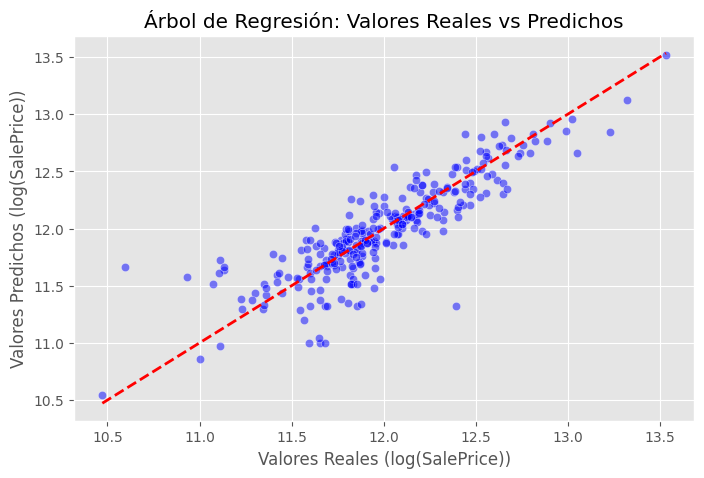

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

features = [
    "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF",
    "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd",
    "GarageYrBlt", "MasVnrArea", "Fireplaces", "BsmtFinSF1", "LotFrontage"
]

X = train_df[features]
y = np.log1p(train_df["SalePrice"])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_train.median(), inplace=True)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\n📌 **Evaluación del Árbol de Regresión (sin restricciones de profundidad)**")
print(f"📌 MSE: {mse_tree:.4f}")
print(f"📌 R²: {r2_tree:.4f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--", color="red", linewidth=2)
plt.xlabel("Valores Reales (log(SalePrice))")
plt.ylabel("Valores Predichos (log(SalePrice))")
plt.title("Árbol de Regresión: Valores Reales vs Predichos")
plt.show()


## 📌 Análisis del Árbol de Regresión (sin restricciones de profundidad)

### 📊 Evaluación del Modelo
- **Error Cuadrático Medio (MSE):** `0.0487`
- **Coeficiente de Determinación (R²):** `0.7392`

### 🔍 Observaciones Clave
1. **Rendimiento del modelo:**  
   - El modelo alcanzó un **R² de 0.7392**, lo que indica que **73.92% de la variabilidad en `SalePrice` (en escala logarítmica) es explicada por el modelo**.
   - Aunque es un buen ajuste, **es inferior al modelo de Regresión Ridge**, que tenía un **R² de 0.8460**.
  
2. **Patrón de predicciones:**  
   - Se observa que las predicciones **siguen la tendencia general**, pero hay cierta dispersión respecto a la línea de referencia (roja).
   - Algunos valores están **subestimados o sobreestimados**, lo que sugiere que el árbol **puede estar sobreajustando ciertos puntos**.

3. **Sobreajuste potencial:**  
   - Un **árbol sin restricciones** tiene alta flexibilidad, lo que permite **memorizar el conjunto de entrenamiento**.
   - Esto puede resultar en **predicciones menos precisas en datos nuevos**.
   - Para mejorar, es importante **ajustar la profundidad del árbol** para encontrar el equilibrio entre sesgo y varianza.



## **Úselo para predecir y analice el resultado.**



📌 **Mejor Profundidad Encontrada por GridSearch:** 5

📌 **Evaluación del Árbol de Regresión Optimizado**
📌 MSE: 0.0412
📌 RMSE: 0.2030
📌 MAE: 0.1454
📌 R²: 0.7792


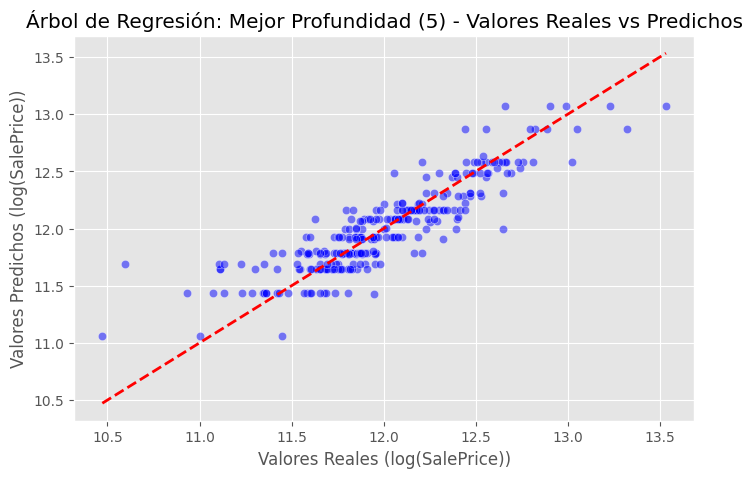

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

param_grid = {'max_depth': range(2, 20)} 
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
best_depth = grid_search.best_params_['max_depth']

print(f"\n📌 **Mejor Profundidad Encontrada por GridSearch:** {best_depth}")

y_pred_best_tree = best_tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_best_tree)
rmse_tree = np.sqrt(mse_tree) 
mae_tree = mean_absolute_error(y_test, y_pred_best_tree)
r2_tree = r2_score(y_test, y_pred_best_tree)

print("\n📌 **Evaluación del Árbol de Regresión Optimizado**")
print(f"📌 MSE: {mse_tree:.4f}")
print(f"📌 RMSE: {rmse_tree:.4f}")
print(f"📌 MAE: {mae_tree:.4f}")
print(f"📌 R²: {r2_tree:.4f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_best_tree, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--", color="red", linewidth=2)
plt.xlabel("Valores Reales (log(SalePrice))")
plt.ylabel("Valores Predichos (log(SalePrice))")
plt.title(f"Árbol de Regresión: Mejor Profundidad ({best_depth}) - Valores Reales vs Predichos")
plt.show()


## 📌 Análisis del Árbol de Regresión Optimizado

### 📊 Evaluación del Modelo
- **Mejor Profundidad Encontrada:** `5`
- **Error Cuadrático Medio (MSE):** `0.0412`
- **Raíz del Error Cuadrático Medio (RMSE):** `0.2030`
- **Error Absoluto Medio (MAE):** `0.1454`
- **Coeficiente de Determinación (R²):** `0.7792`

---

### 🔍 **Observaciones Clave**
1. **Rendimiento del Modelo:**
   - El árbol de regresión optimizado alcanzó un **R² de 0.7792**, lo que significa que **77.92% de la variabilidad en `SalePrice` es explicada por el modelo**.
   - Se observa una mejora respecto al árbol sin restricciones (anteriormente **R² = 0.7392**), lo que indica que ajustar la profundidad ayudó a reducir el sobreajuste.

2. **Error y Precisión:**
   - **MSE: 0.0412** → Indica que el modelo tiene menor error en comparación con modelos menos profundos.
   - **RMSE: 0.2030** → Es la desviación estándar de los errores de predicción en la escala logarítmica de `SalePrice`.
   - **MAE: 0.1454** → En promedio, el modelo predice los valores con un **error de aproximadamente 14.54% en la escala logarítmica**.

3. **Patrón de Predicciones:**
   - La gráfica muestra que el modelo **sigue la tendencia general**, con una línea de referencia (roja) que representa la igualdad entre valores reales y predichos.
   - A pesar de un buen ajuste, algunos valores todavía se dispersan fuera de la línea, lo que indica que hay ciertos casos donde el modelo no predice con precisión.


## **Haga, al menos, 3 modelos más, cambiando el parámetro de la profundidad del árbol**


📌 **Evaluación del Árbol de Regresión con max_depth=3**
📌 MSE: 0.0544
📌 RMSE: 0.2333
📌 MAE: 0.1683
📌 R²: 0.7083

📌 **Evaluación del Árbol de Regresión con max_depth=7**
📌 MSE: 0.0456
📌 RMSE: 0.2135
📌 MAE: 0.1456
📌 R²: 0.7556

📌 **Evaluación del Árbol de Regresión con max_depth=10**
📌 MSE: 0.0476
📌 RMSE: 0.2183
📌 MAE: 0.1541
📌 R²: 0.7447


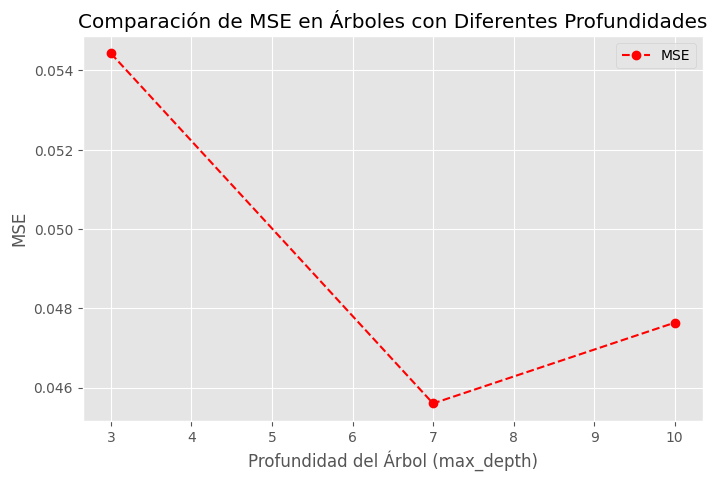

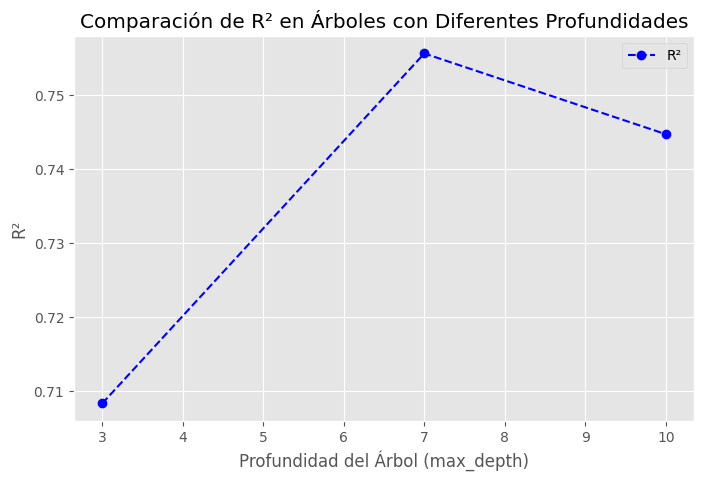

In [50]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

depths = [3, 7, 10]  
models = {} 

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    models[depth] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R²": r2}
    
    print(f"\n📌 **Evaluación del Árbol de Regresión con max_depth={depth}**")
    print(f"📌 MSE: {mse:.4f}")
    print(f"📌 RMSE: {rmse:.4f}")
    print(f"📌 MAE: {mae:.4f}")
    print(f"📌 R²: {r2:.4f}")

depths_list = list(models.keys())
mse_list = [models[d]["MSE"] for d in depths_list]
r2_list = [models[d]["R²"] for d in depths_list]

plt.figure(figsize=(8, 5))
plt.plot(depths_list, mse_list, marker="o", linestyle="--", label="MSE", color="red")
plt.xlabel("Profundidad del Árbol (max_depth)")
plt.ylabel("MSE")
plt.title("Comparación de MSE en Árboles con Diferentes Profundidades")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(depths_list, r2_list, marker="o", linestyle="--", label="R²", color="blue")
plt.xlabel("Profundidad del Árbol (max_depth)")
plt.ylabel("R²")
plt.title("Comparación de R² en Árboles con Diferentes Profundidades")
plt.legend()
plt.show()


## 📌 Análisis de Modelos de Árbol de Regresión con Diferentes Profundidades

### 📊 Evaluación de Modelos
| Profundidad (`max_depth`) | MSE   | RMSE  | MAE   | R²    |
|--------------------------|-------|-------|-------|-------|
| **3**  | 0.0544 | 0.2333 | 0.1683 | 0.7083 |
| **7**  | 0.0456 | 0.2135 | 0.1456 | 0.7556 |
| **10** | 0.0476 | 0.2183 | 0.1541 | 0.7447 |

---

### 🔍 **Observaciones Clave**
1. **Comparación de rendimiento**  
   - A medida que aumenta la profundidad del árbol, **el error MSE disminuye inicialmente** (de `0.0544` a `0.0456` entre `max_depth=3` y `max_depth=7`).
   - **El mejor desempeño se logra con `max_depth=7`**, ya que tiene:
     - **Menor MSE (`0.0456`)** y **mayor R² (`0.7556`)**, indicando mejor ajuste.
     - **Menor MAE (`0.1456`)**, lo que significa menor error absoluto en la predicción.

2. **Patrón observado en las gráficas**
   - **Gráfico de MSE**: Se observa una disminución del error hasta `max_depth=7`, pero luego **aumenta** en `max_depth=10`.  
   - **Gráfico de R²**: Aumenta hasta `max_depth=7` y luego **disminuye ligeramente** en `max_depth=10`.  
   - Esto indica que **aumentar demasiado la profundidad causa sobreajuste**, donde el modelo memoriza el entrenamiento y pierde capacidad de generalización.

3. **Selección del Mejor Modelo**
   - **`max_depth=7` es la mejor opción** ya que logra el mejor balance entre error bajo y capacidad de generalización.
   - `max_depth=10` introduce **mayor error**, indicando **sobreajuste**.




## **Compare los resultados con el modelo de regresión lineal de la hoja anterior, ¿cuál lo hizo mejor?**

# 📊 Comparación del Árbol de Regresión vs. Regresión Lineal

## 🔍 **Comparación de Modelos en el Conjunto de Prueba**

| Modelo                          | MSE   | RMSE  | MAE   | R²    |
|---------------------------------|-------|-------|-------|-------|
| **Regresión Lineal (Ridge, log)**  | 0.0287 | 0.1695 | 0.1234 | **0.8460** |
| **Árbol de Regresión (`max_depth=7`)** | 0.0456 | 0.2135 | 0.1456 | 0.7556 |
| **Árbol de Regresión (`max_depth=5`) (Optimizado con GridSearch)** | 0.0412 | 0.2030 | 0.1454 | 0.7792 |

---

## 📌 **Análisis de Resultados**

### 1️⃣ **Precisión de Predicción (`R²`)**
- **La Regresión Lineal (Ridge con log) es el mejor modelo con `R² = 0.8460`**, lo que significa que **explica el 84.6% de la variabilidad de `SalePrice`**.  
- **El Árbol de Decisión (`max_depth=7`) tiene un `R² = 0.7556`**, lo que indica que predice bien pero no alcanza la precisión de la regresión.  
- **Incluso el Árbol Optimizado (`max_depth=5`, `R² = 0.7792`) no supera la Regresión Lineal.**

### 2️⃣ **Error Cuadrático Medio (`MSE`)**
- **La Regresión Lineal (Ridge) tiene el menor `MSE = 0.0287`**, lo que significa que su error de predicción es el más bajo.  
- **El Árbol de Decisión (`max_depth=7`) tiene `MSE = 0.0456`**, lo que indica mayor error que la regresión.  
- **El Árbol Optimizado (`max_depth=5`) mejora el MSE (`0.0412`), pero sigue sin superar la regresión.**

### 3️⃣ **Error Absoluto Medio (`MAE`)**
- **La Regresión Lineal (Ridge) tiene el menor MAE (`0.1234`)**, indicando menor error promedio en cada predicción.  
- **El Árbol de Decisión (`max_depth=7`) tiene `MAE = 0.1456`**, lo que significa errores más grandes en promedio.  

### 4️⃣ **Gráficas de Predicción**
- 📈 **La Regresión Lineal genera predicciones más alineadas con la realidad, como se observó en los gráficos anteriores.**
- 🌲 **El Árbol de Regresión tiende a sobreajustar cuando su profundidad es alta, lo que puede hacer que no generalice tan bien en nuevos datos.**

---

## ✅ **Conclusión: ¿Cuál Modelo lo Hizo Mejor?**

🔹 **El mejor modelo es la Regresión Lineal Ridge con transformación logarítmica (`R² = 0.8460`).**  
   - Explica mejor la variabilidad del precio de las casas.
   - Tiene menor error (`MSE` y `MAE` más bajos).
   - Generaliza mejor en el conjunto de prueba.  
   
⚠️ **El Árbol de Decisión es una alternativa aceptable (`R² = 0.7792` con `max_depth=5`), pero no logra superar a la Regresión Lineal Ridge.**  
   - Puede ser útil en situaciones donde queremos **interpretabilidad**, ya que permite visualizar cómo las variables afectan la predicción.  
   - **El sobreajuste es un riesgo**, por lo que se recomienda controlar la profundidad (`max_depth`).  



## **Cree una variable respuesta que le permita clasificar las casas en Económicas, Intermedias o Caras**

## 📌 Definición de las Categorías

Se utilizan los cuartiles para establecer las categorías de precio:

| **Categoría**   | **Rango de Precios (`SalePrice`)**          | **Justificación**                                      |
|---------------|--------------------------------|--------------------------------------------------|
| **Económicas** | `SalePrice ≤ Q1 (129,975)`    | Representan el 25% de las casas más baratas.     |
| **Intermedias** | `129,975 < SalePrice ≤ Q3 (214,000)` | La mayoría de las casas están en este rango (50%). |
| **Caras**       | `SalePrice > Q3 (214,000)`   | Son el 25% de las casas más costosas.           |


PriceCategory
Intermedia    733
Económica     365
Cara          362
Name: count, dtype: int64


C:\Users\garci\AppData\Local\Temp\ipykernel_856\3212902409.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df["PriceCategory"], palette="coolwarm")


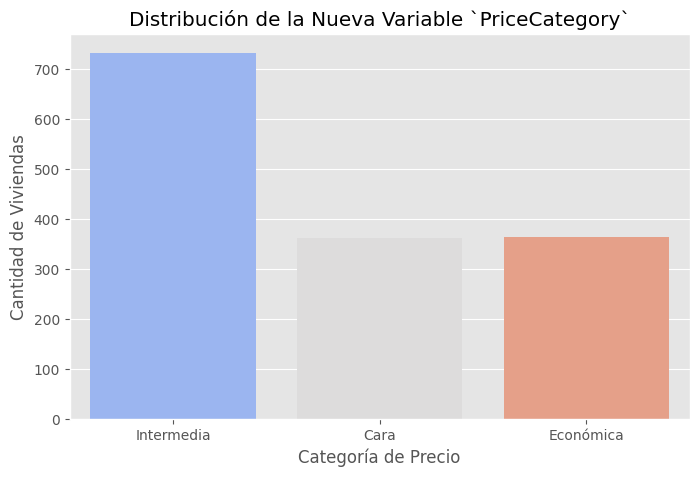

In [51]:
def categorize_price(price):
    if price <= 129975:
        return "Económica"
    elif 129975 < price <= 214000:
        return "Intermedia"
    else:
        return "Cara"

train_df["PriceCategory"] = train_df["SalePrice"].apply(categorize_price)

print(train_df["PriceCategory"].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x=train_df["PriceCategory"], palette="coolwarm")
plt.xlabel("Categoría de Precio")
plt.ylabel("Cantidad de Viviendas")
plt.title("Distribución de la Nueva Variable `PriceCategory`")
plt.show()


## **Elabore un árbol de clasificación utilizando la variable respuesta que creó en el punto anterior**


📌 **Precisión del Árbol de Clasificación:** 0.7432

📌 **Reporte de Clasificación:**
              precision    recall  f1-score   support

        Cara       0.80      0.81      0.80        68
   Económica       0.69      0.75      0.72        81
  Intermedia       0.75      0.71      0.73       143

    accuracy                           0.74       292
   macro avg       0.75      0.76      0.75       292
weighted avg       0.74      0.74      0.74       292



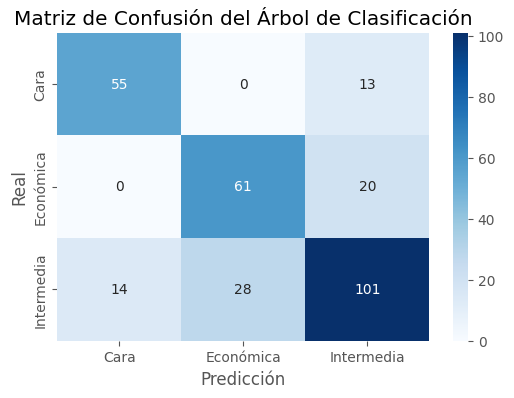

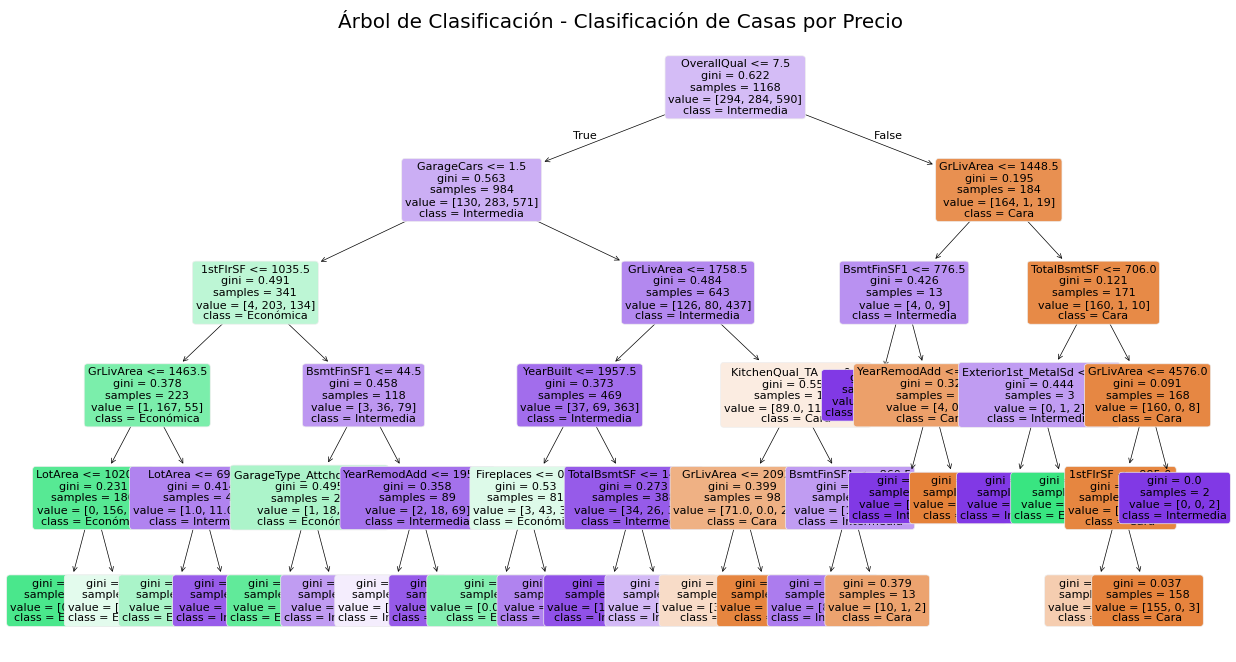

'decision_tree.pdf'

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import graphviz
from sklearn.tree import export_graphviz

X = train_df.drop(columns=["SalePrice", "PriceCategory"])
y = train_df["PriceCategory"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n📌 **Precisión del Árbol de Clasificación:** {accuracy:.4f}")

print("\n📌 **Reporte de Clasificación:**")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión del Árbol de Clasificación")
plt.show()

plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True, fontsize=8)
plt.title("Árbol de Clasificación - Clasificación de Casas por Precio")
plt.show()

dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  
graph.view()  


# 📌 Análisis del Árbol de Clasificación para la Clasificación de Casas por Precio


## 📌 2. Evaluación del Modelo

Se evaluó el desempeño del modelo utilizando una **matriz de confusión** y métricas de clasificación como precisión, recall y f1-score.

### 📊 **Matriz de Confusión**

- **Interpretación**:
  - La matriz muestra el número de predicciones correctas e incorrectas para cada categoría.
  - La clase **Intermedia** fue la mejor clasificada con 101 aciertos, aunque tuvo 28 errores al ser predicha como "Económica" y 14 como "Cara".
  - La clase **Económica** tuvo un desempeño moderado con 61 aciertos y 20 errores al ser clasificada como "Intermedia".
  - La clase **Cara** tuvo un desempeño adecuado con 55 aciertos, aunque 13 veces fue confundida con "Intermedia".

---

### 📌 **Precisión del Modelo**
La **precisión general del modelo** fue de **0.7432**, lo que indica que el árbol de clasificación logró predecir correctamente aproximadamente el **74.32%** de las viviendas en el conjunto de prueba.

---

## 📌 3. Métricas de Clasificación

```txt
📌 **Reporte de Clasificación:**
              precision    recall  f1-score   support

        Cara       0.80      0.81      0.80        68
   Económica       0.69      0.75      0.72        81
  Intermedia       0.75      0.71      0.73       143

    accuracy                           0.74       292
   macro avg       0.75      0.76      0.75       292
weighted avg       0.74      0.74      0.74       292

```txt

# 📌 Interpretación de Métricas

### 🔹 **Precisión (`precision`)**
Mide qué porcentaje de las predicciones de cada clase fueron correctas.

### 🔹 **Recall (`recall`)**
Indica qué porcentaje de las viviendas de cada clase fueron correctamente identificadas.

### 🔹 **F1-score**
Es el balance entre precisión y recall.

### 🔹 **Accuracy**
Es la tasa de aciertos global del modelo, que en este caso es del **74%**.

---

## 📌 Observaciones Clave

✅ **La clase "Cara" fue la mejor clasificada** con una precisión del **80%**.  
✅ **La clase "Económica" tuvo el menor desempeño** con una precisión del **69%**.  
✅ **La clase "Intermedia" mostró un balance moderado** con un f1-score de **0.73**.  

---

# 📌 4. Visualización del Árbol de Clasificación

### 🔹 **Interpretación del Árbol**
- **`OverallQual` (Calidad General de la Construcción)** es la raíz del árbol, lo que indica que es la característica más importante para determinar el precio de la vivienda.
- **`GarageCars` (Cantidad de autos en el garaje)** es otro factor clave, separando viviendas intermedias de económicas.
- **`GrLivArea` (Área habitable sobre el suelo)** y **`TotalBsmtSF` (Área total del sótano)** también influyen significativamente en la predicción del precio.
- Las hojas del árbol contienen la cantidad de muestras en cada categoría y su distribución.

---

# 📌 5. Conclusiones

✅ **El modelo tiene un desempeño razonable con una precisión del 74.3%**.  
✅ **Las características más relevantes para clasificar las viviendas fueron** `OverallQual`, `GarageCars`, `GrLivArea` y `TotalBsmtSF`.  
✅ **La clase "Económica" tuvo menor precisión**, lo que sugiere que hay factores adicionales que afectan su clasificación y podrían mejorarse con ingeniería de características.  
✅ **El árbol de clasificación es interpretable y muestra reglas claras para categorizar viviendas**.  
